In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn_pandas import DataFrameMapper

%matplotlib inline

In [3]:
# Read file
icfes = pd.read_csv("./data/icfes.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)
print(len(icfes))
icfes.head()

(559253, 81)
559253


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,URBANO,N,B,TÉCNICO/ACADÉMICO,17228,376001000314,376001000314,76,76001,VALLE,...,15,4,1,20171,35,177,45,44,31,28
1,URBANO,NaN,B,NaN,663120,319001005240,319001005240,19,19001,CAUCA,...,78,62,85,20171,66,326,55,67,61,70
2,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,91,99,76,20171,70,378,100,72,86,66
3,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,96,96,100,20171,72,389,85,75,79,83
4,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,38,35,63,20171,52,281,80,54,50,61


In [4]:
icfes.describe(include='all')

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
count,559253,479658,559253,550568,559253.000000,5.592530e+05,5.592530e+05,559253.000000,559253.000000,559253,...,559253.000000,559253.000000,559253.000000,559253.000000,559253.00000,559253.000000,559253.000000,559253.000000,559253.000000,559253.000000
unique,2,2,3,4,NaN,NaN,NaN,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,URBANO,N,A,ACADÉMICO,NaN,NaN,NaN,NaN,NaN,BOGOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,475336,470337,542338,301332,NaN,NaN,NaN,NaN,NaN,90953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,140244.643415,2.078890e+11,2.083958e+11,32.822204,33054.508553,NaN,...,50.477698,50.489648,50.503897,20171.976767,51.48688,256.611432,49.992833,53.399356,50.347531,50.497778
std,NaN,NaN,NaN,NaN,170163.577928,9.541512e+10,9.608404e+10,26.625493,26649.109448,NaN,...,28.894852,28.886292,28.863344,0.150642,10.20125,49.340166,11.993842,9.889415,12.155660,11.263646
min,NaN,NaN,NaN,NaN,18.000000,1.050010e+11,1.050010e+11,5.000000,5001.000000,NaN,...,1.000000,1.000000,1.000000,20171.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,36632.000000,1.178670e+11,1.178730e+11,11.000000,11001.000000,NaN,...,25.000000,25.000000,26.000000,20172.000000,44.00000,219.000000,41.000000,46.000000,41.000000,42.000000
50%,NaN,NaN,NaN,NaN,97790.000000,1.760010e+11,1.760010e+11,20.000000,20550.000000,NaN,...,51.000000,51.000000,51.000000,20172.000000,51.00000,254.000000,48.000000,53.000000,50.000000,50.000000
75%,NaN,NaN,NaN,NaN,154922.000000,3.080010e+11,3.080010e+11,54.000000,54344.000000,NaN,...,75.000000,76.000000,75.000000,20172.000000,59.00000,291.000000,57.000000,60.000000,59.000000,58.000000


In [5]:
# Correlation
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_icfes = icfes.select_dtypes(include=numerics)

correlation = numeric_icfes.corr(method='pearson')

correlation

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
COLE_CODIGO_ICFES,1.000000,0.008963,0.011755,-0.002710,-0.002396,-0.114763,-0.105579,-0.120382,-0.109032,-0.006341,...,-0.108821,-0.124529,-0.109403,0.071756,-0.125102,-0.136481,-0.128419,-0.114598,-0.131314,-0.116941
COLE_COD_DANE_ESTABLECIMIENTO,0.008963,1.000000,0.987108,0.218499,0.217928,0.083808,0.075905,0.067590,0.095323,0.211766,...,0.061724,0.058287,0.071904,-0.241625,0.093694,0.109235,0.177477,0.082791,0.086072,0.101253
COLE_COD_DANE_SEDE,0.011755,0.987108,1.000000,0.217502,0.216956,0.081897,0.073544,0.065516,0.093223,0.210765,...,0.059190,0.056289,0.069858,-0.239920,0.091683,0.106672,0.174567,0.080120,0.083911,0.099049
COLE_COD_DEPTO_UBICACION,-0.002710,0.218499,0.217502,1.000000,0.999941,-0.008163,-0.029565,-0.024341,-0.029220,0.984171,...,-0.038841,-0.034706,-0.040658,-0.091537,-0.009766,-0.030192,-0.049438,-0.031679,-0.026718,-0.031602
COLE_COD_MCPIO_UBICACION,-0.002396,0.217928,0.216956,0.999941,1.000000,-0.009364,-0.030920,-0.025598,-0.030505,0.984118,...,-0.040282,-0.035996,-0.041959,-0.090685,-0.011064,-0.031750,-0.051155,-0.033169,-0.028069,-0.032965
DESEMP_C_NATURALES,-0.114763,0.083808,0.081897,-0.008163,-0.009364,1.000000,0.632058,0.680231,0.691149,-0.009697,...,0.684556,0.729201,0.726288,-0.155835,0.919105,0.843029,0.628340,0.693599,0.740580,0.736896
DESEMP_LECTURA_CRITICA,-0.105579,0.075905,0.073544,-0.029565,-0.030920,0.632058,1.000000,0.627890,0.686427,-0.031305,...,0.900388,0.675180,0.730045,-0.125622,0.688068,0.820077,0.606343,0.913441,0.682798,0.736112
DESEMP_MATEMATICAS,-0.120382,0.067590,0.065516,-0.024341,-0.025598,0.680231,0.627890,1.000000,0.649961,-0.025625,...,0.679720,0.911574,0.688986,-0.132509,0.734598,0.834685,0.600711,0.685809,0.920401,0.694867
DESEMP_SOCIALES_CIUDADANAS,-0.109032,0.095323,0.093223,-0.029220,-0.030505,0.691149,0.686427,0.649961,1.000000,-0.031069,...,0.746244,0.700979,0.920394,-0.145736,0.747309,0.858060,0.631550,0.751654,0.710451,0.929947
ESTU_COD_DEPTO_PRESENTACION,-0.006341,0.211766,0.210765,0.984171,0.984118,-0.009697,-0.031305,-0.025625,-0.031069,1.000000,...,-0.040451,-0.035867,-0.042326,-0.088500,-0.011447,-0.032250,-0.052517,-0.033525,-0.028172,-0.033605


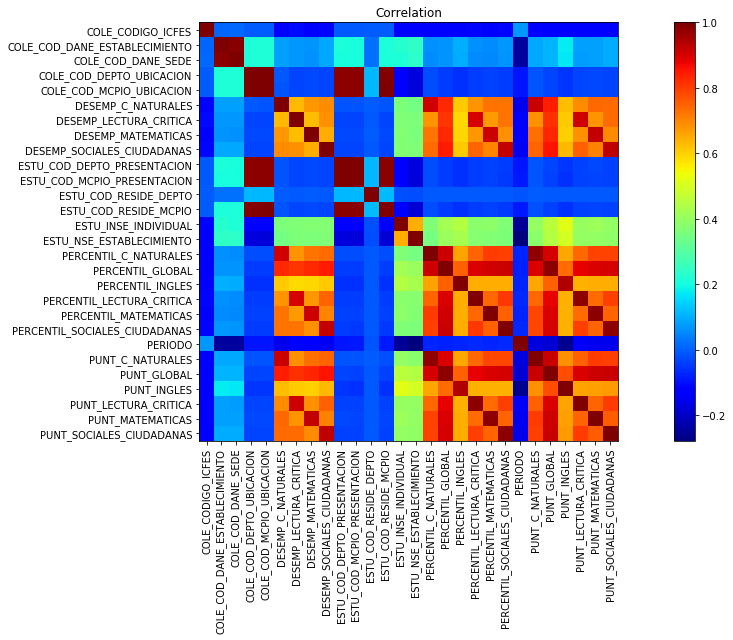

In [6]:
def plot_heatmap(corr, fig_file=None):
    r, c = (1, 1)
    fig, axes = plt.subplots(r, c, figsize=(16*c, 9*r))
    axes = np.array(axes).reshape(-1)

    ax1 = axes[0]
    cax = ax1.imshow(corr, cmap=plt.cm.jet)
    
    ax1.grid(False)
    ax1.set_title("Correlation")
    x_labels = corr.columns
    y_labels = corr.index.values
    # We want to show all ticks...
    ax1.set_xticks(np.arange(len(x_labels)))
    ax1.set_yticks(np.arange(len(y_labels)))
    ax1.set_xticklabels(x_labels, rotation='vertical')
    ax1.set_yticklabels(y_labels)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)

    plt.tight_layout()
    
    # save figure
    if fig_file:
        plt.savefig(fig_file)
    plt.show()
    
plot_heatmap(correlation, fig_file=None)

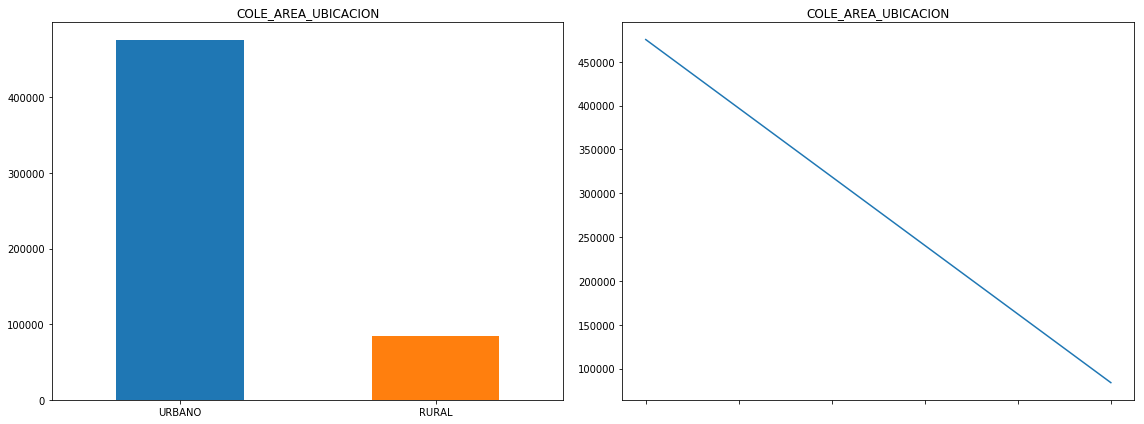

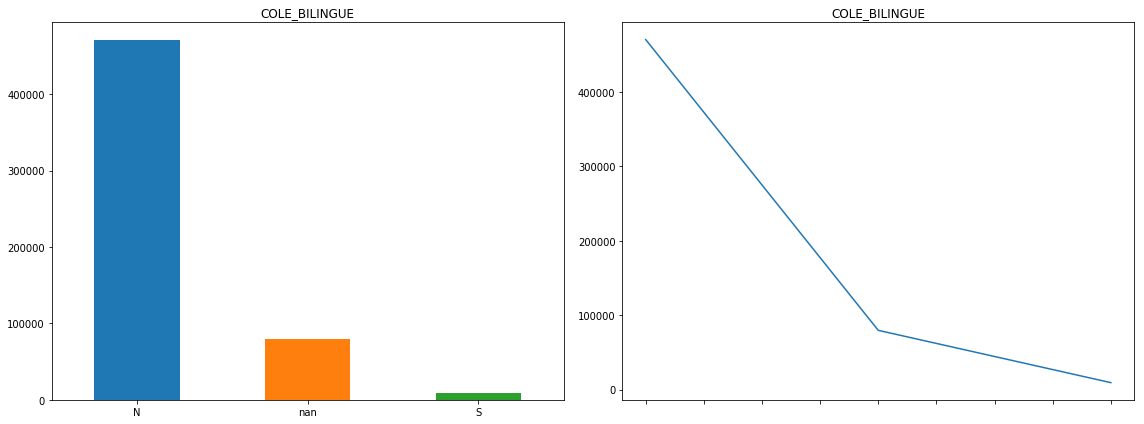

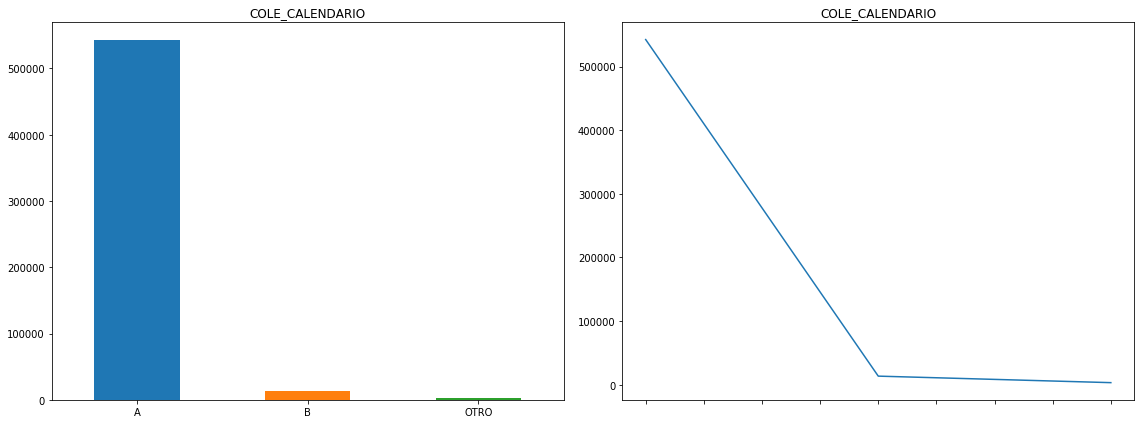

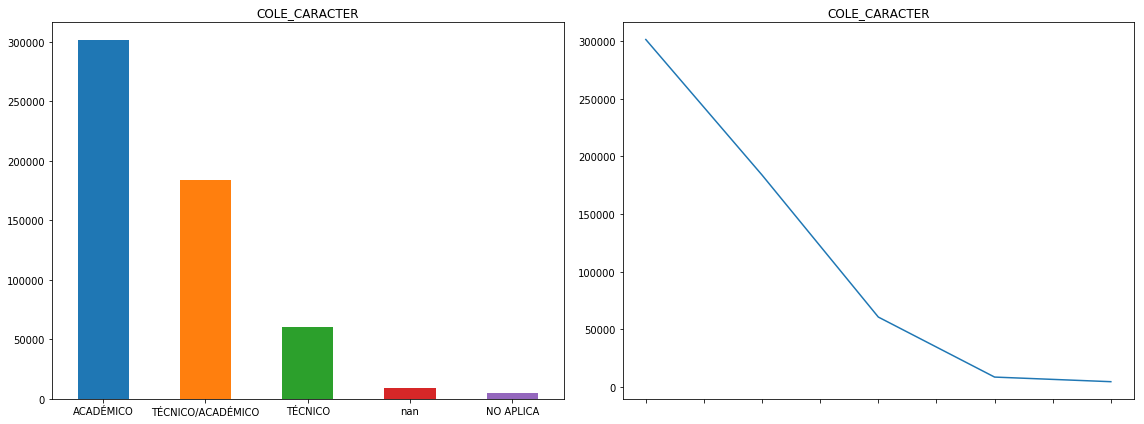

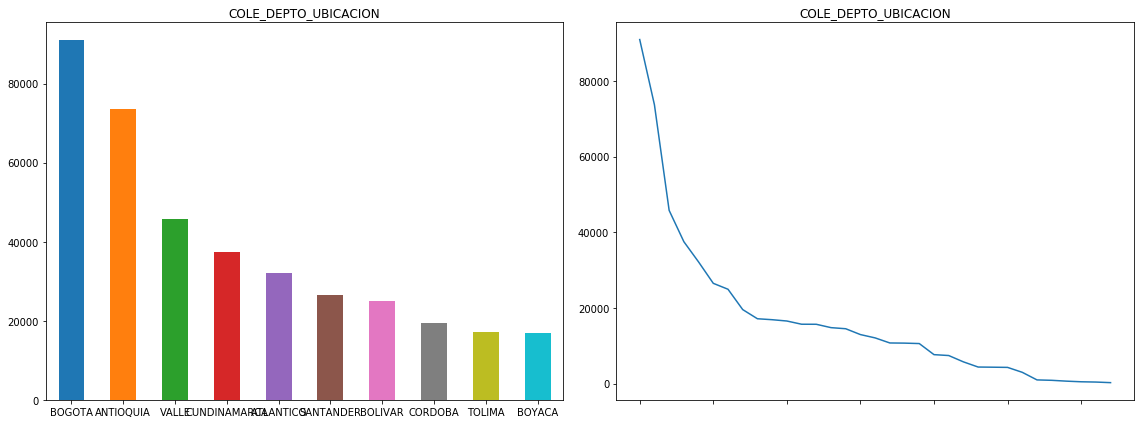

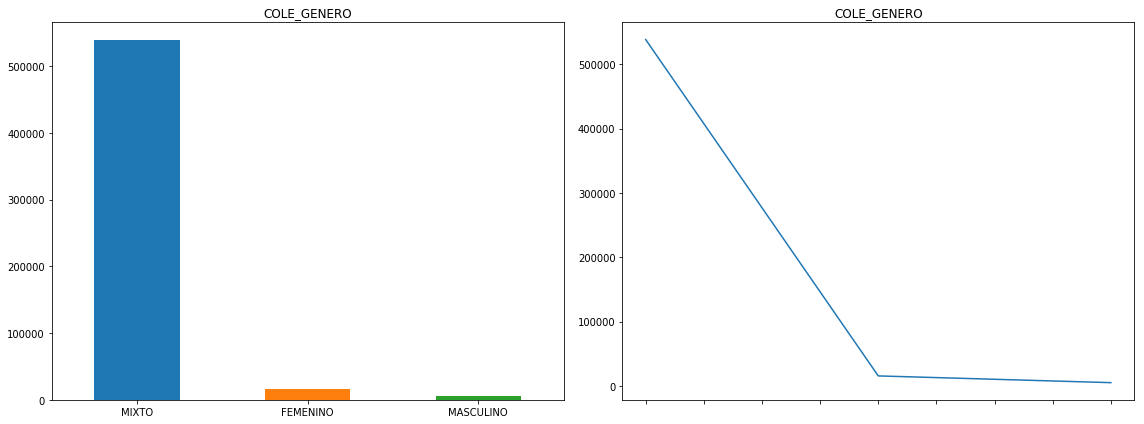

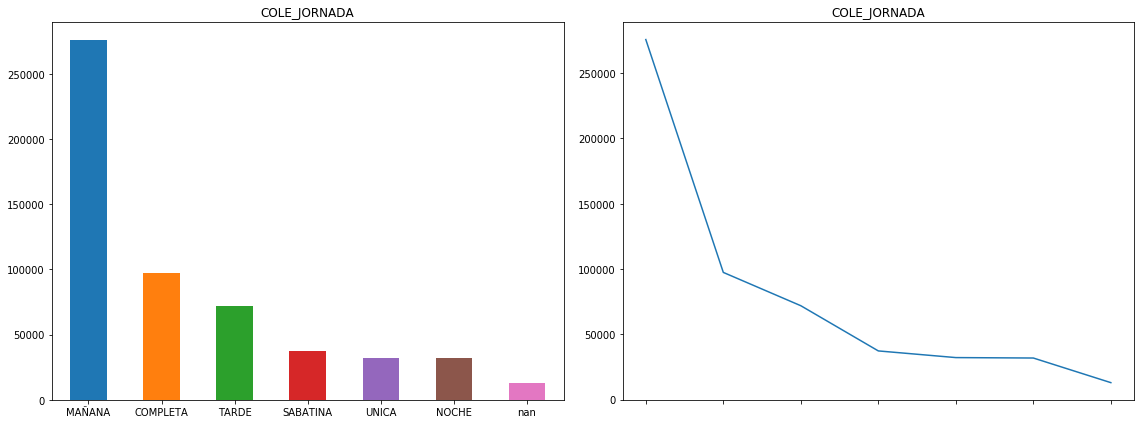

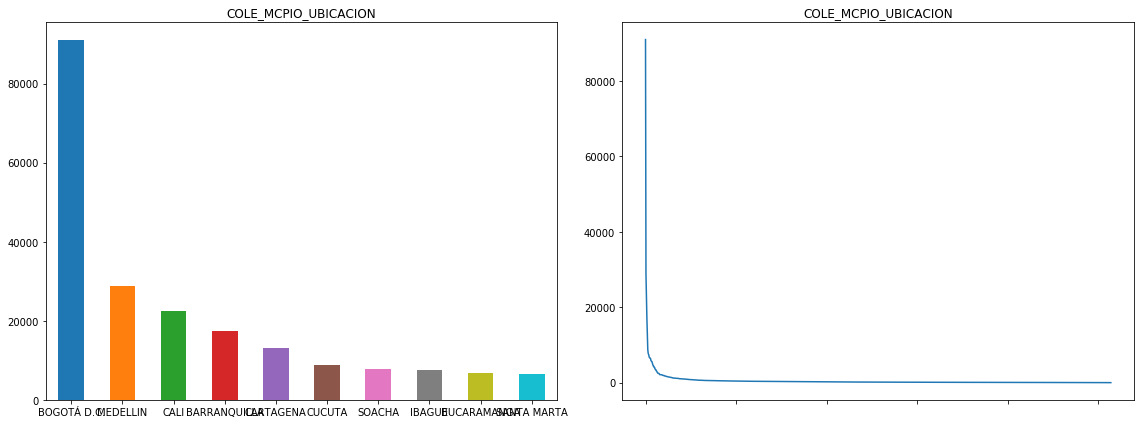

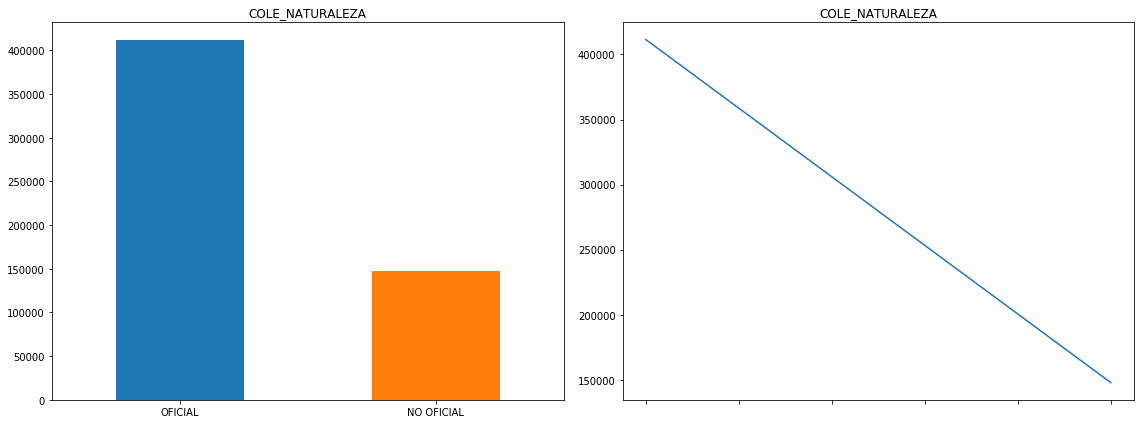

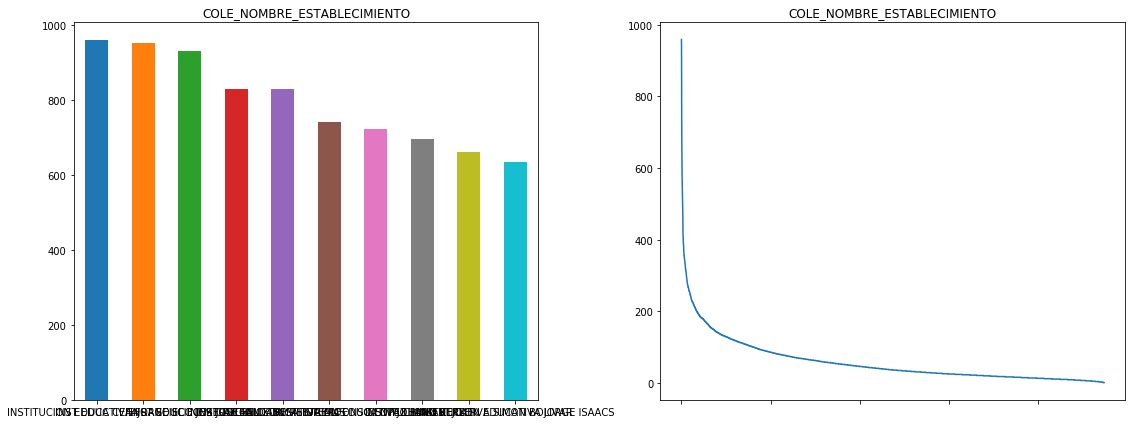

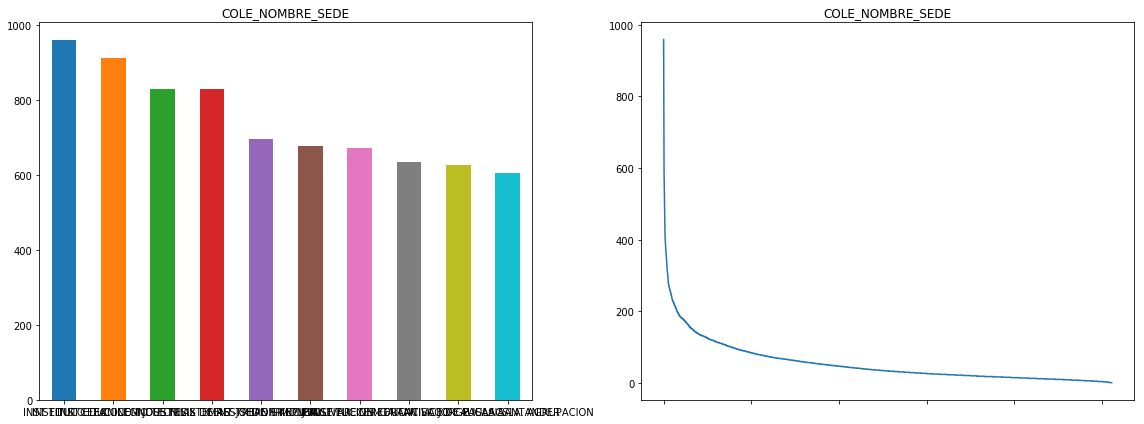

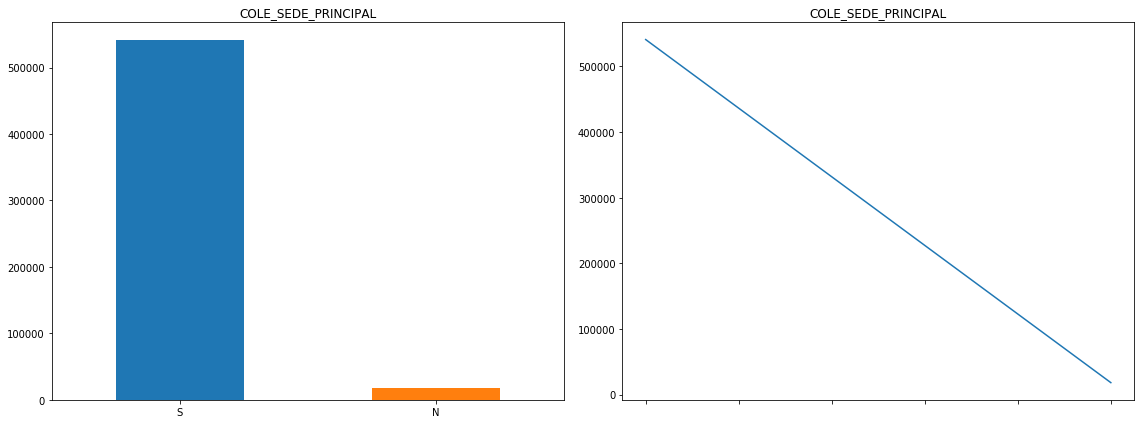

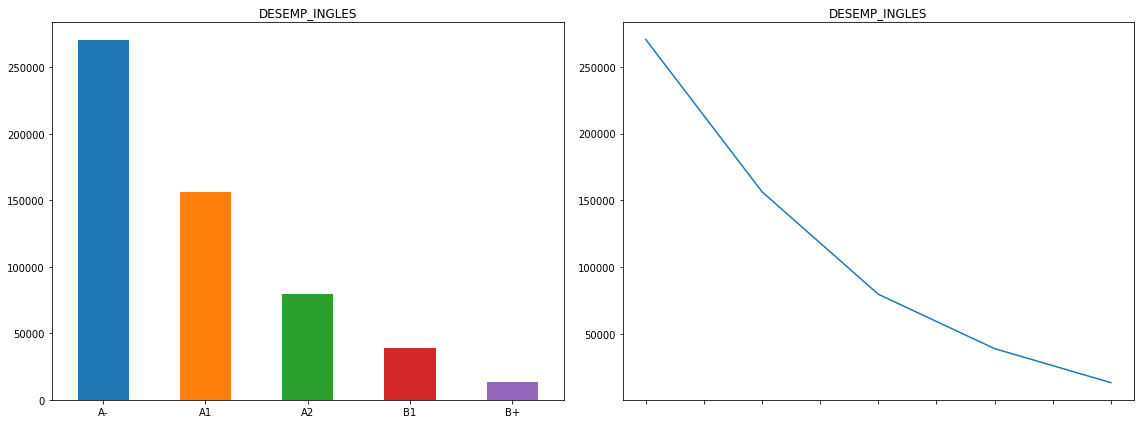

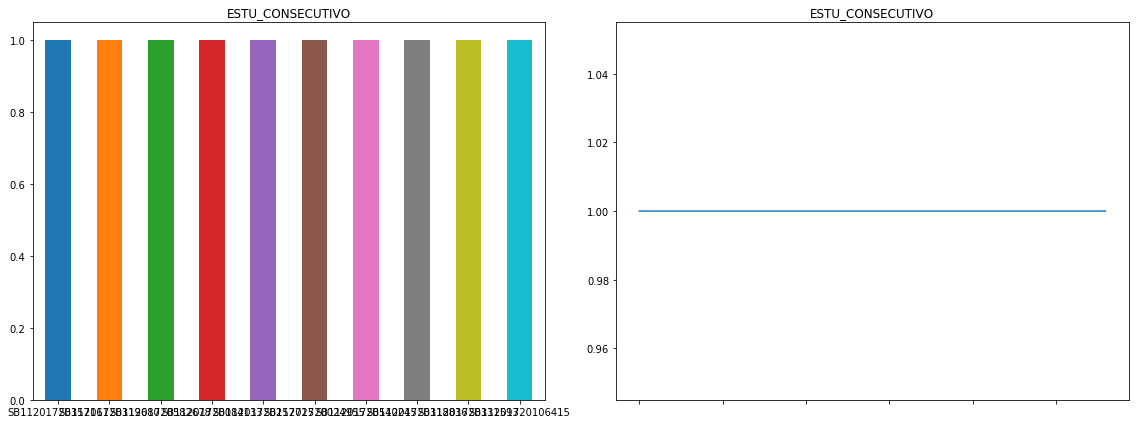

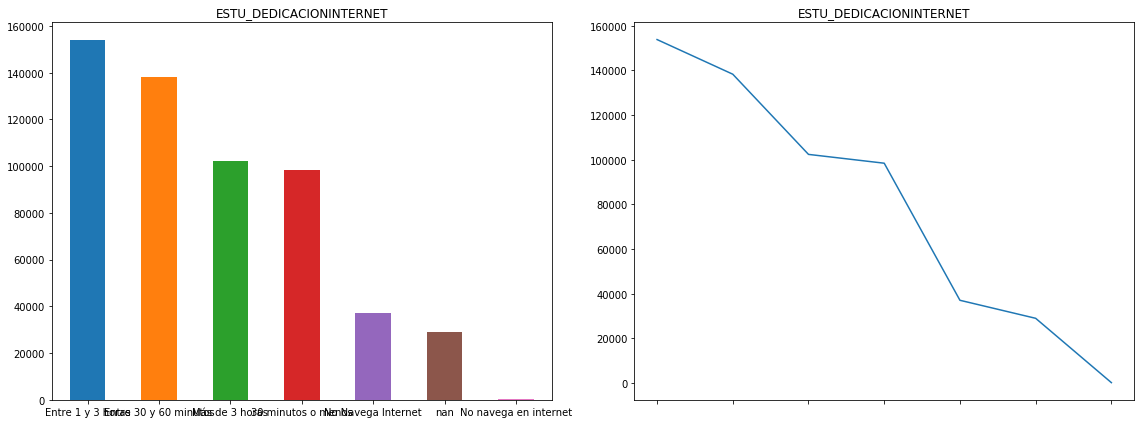

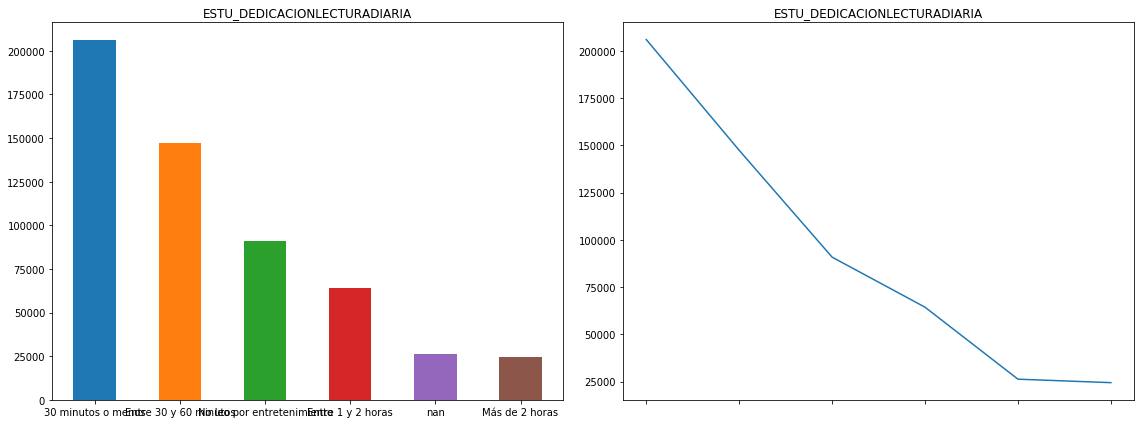

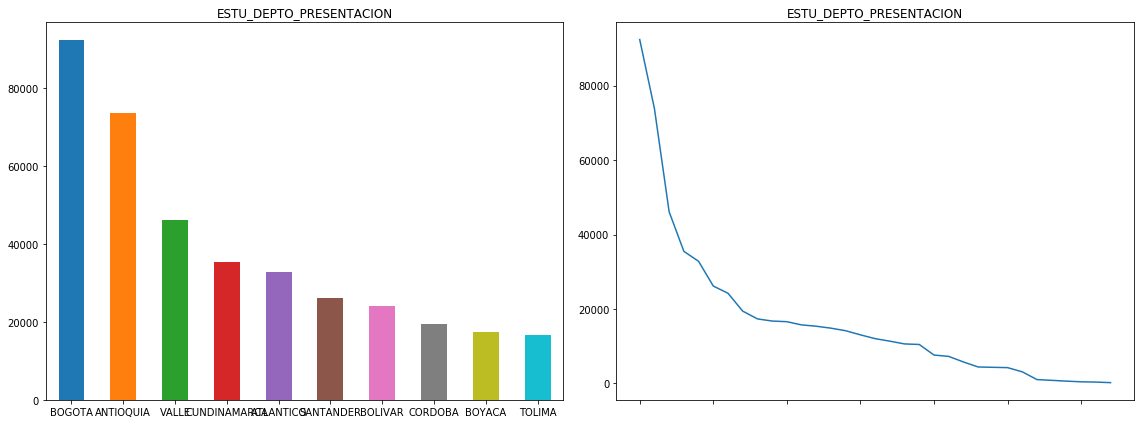

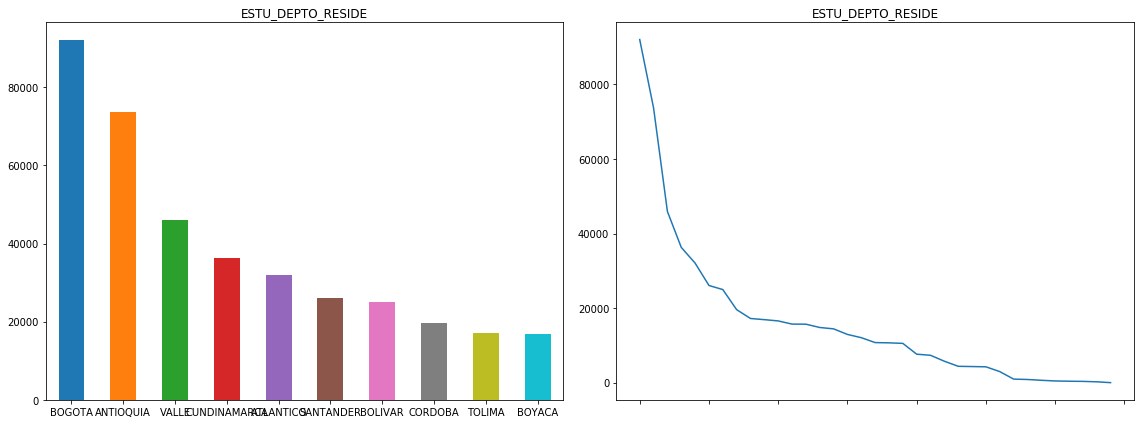

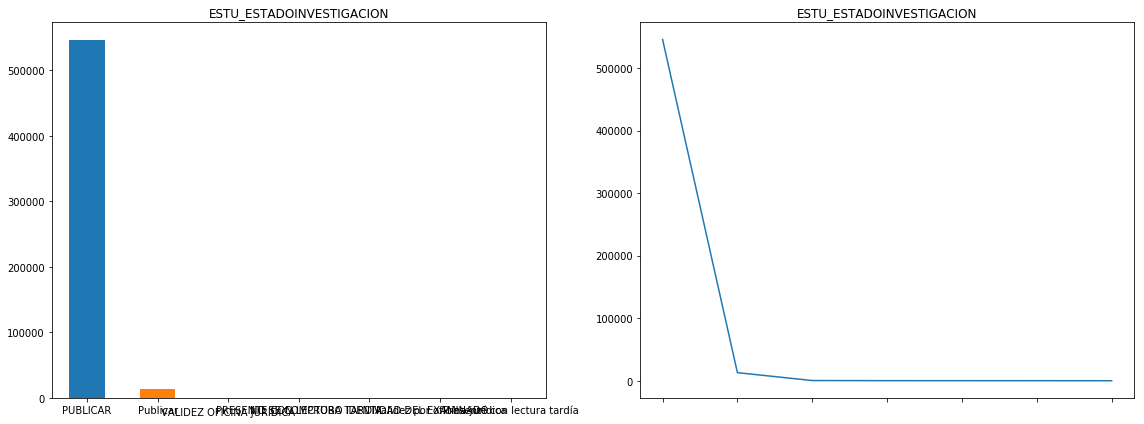

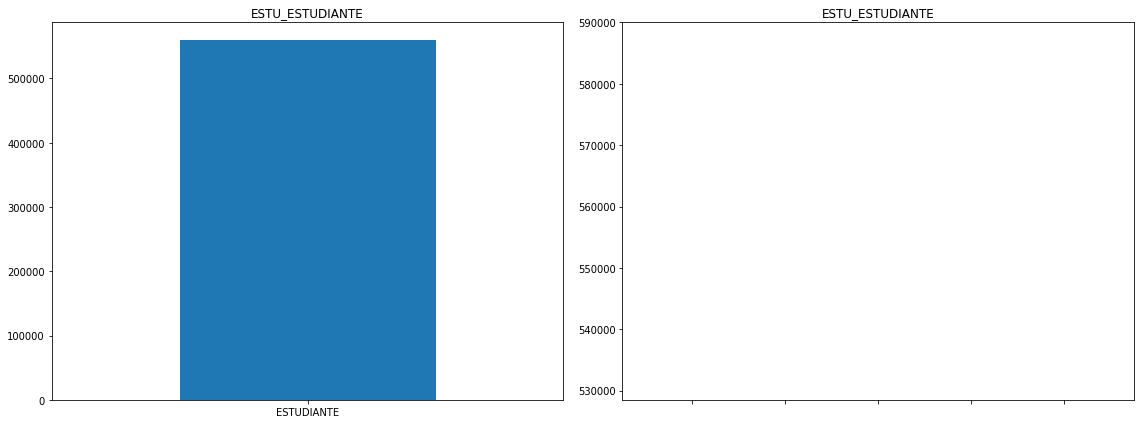

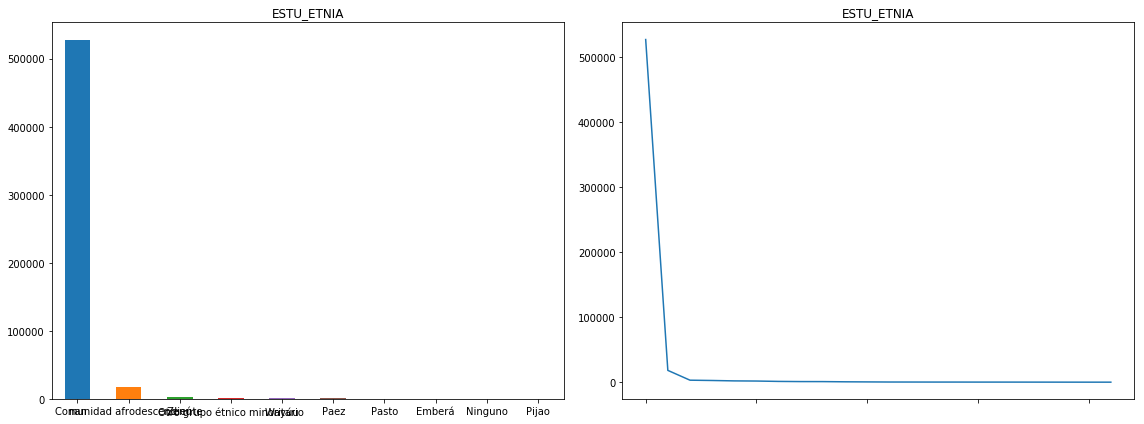

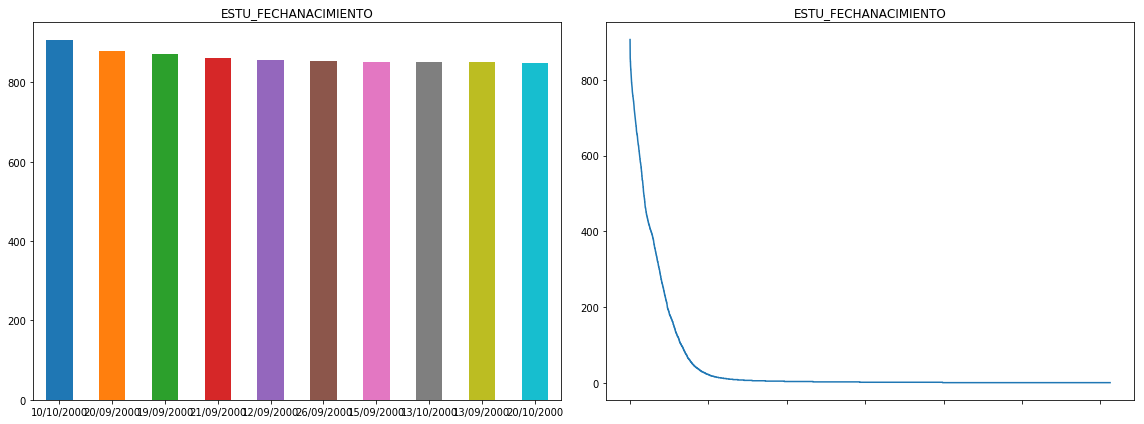

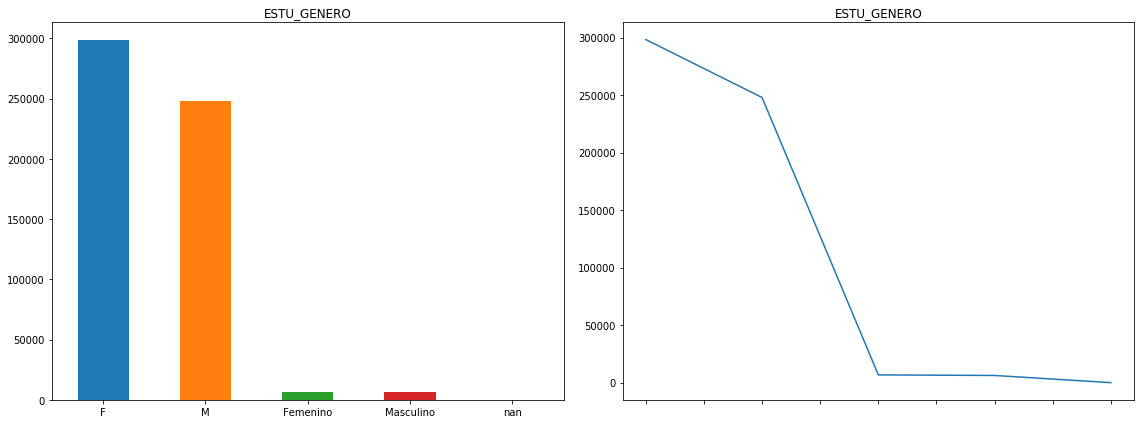

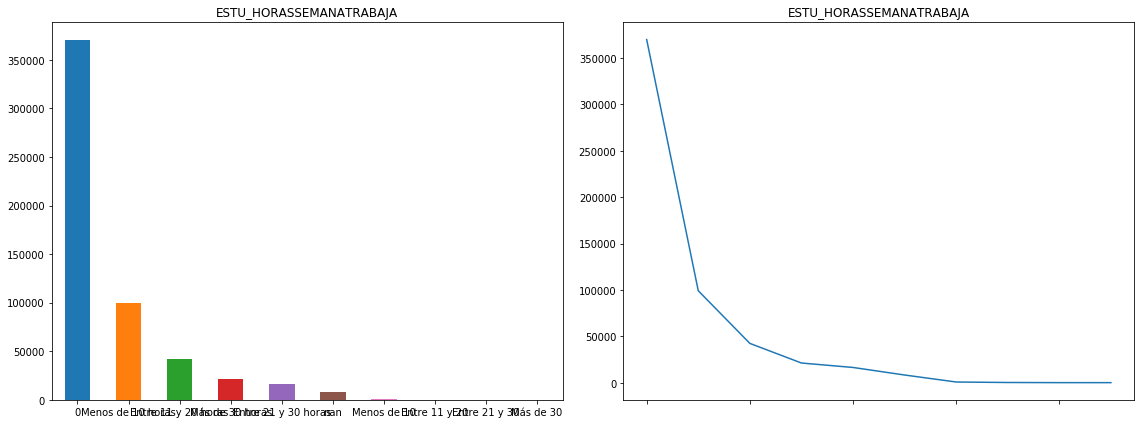

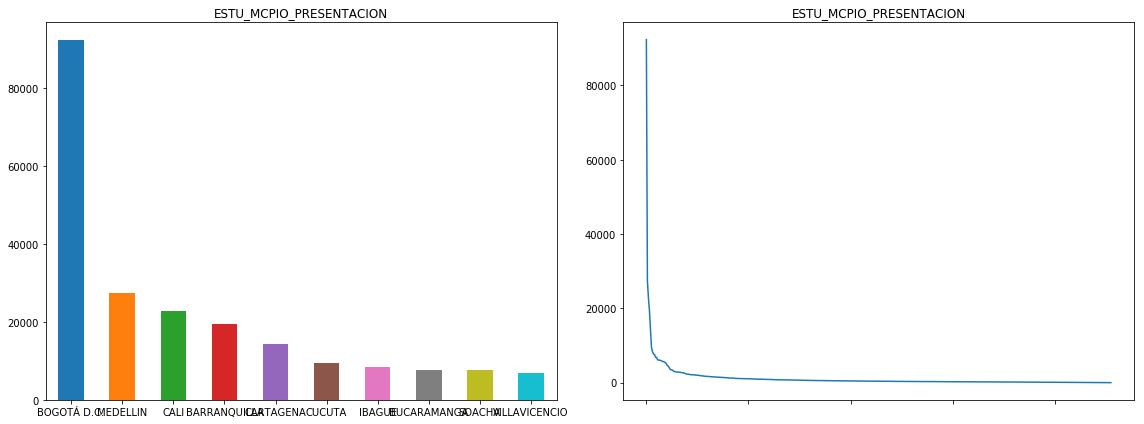

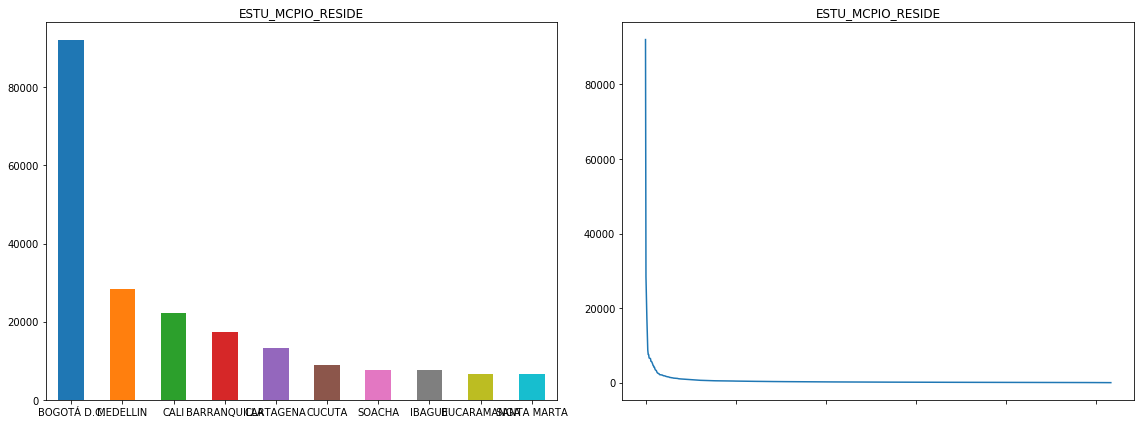

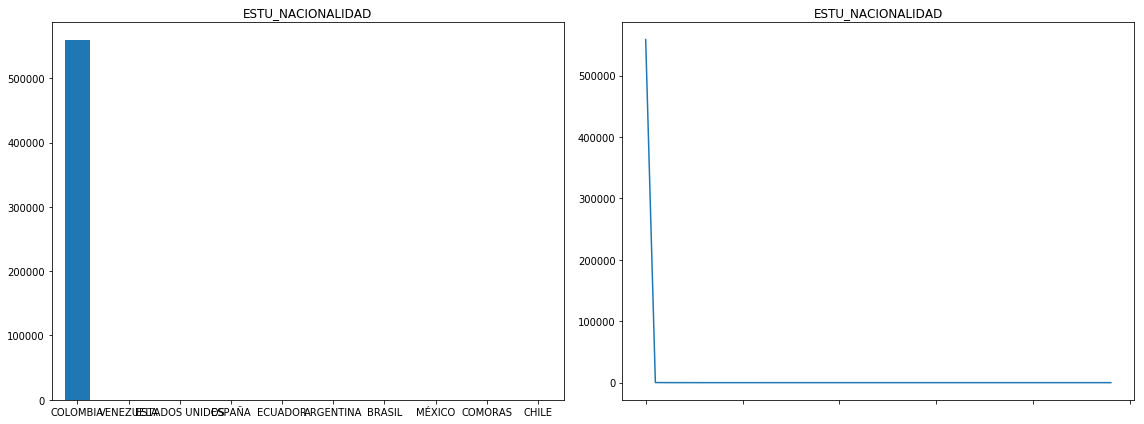

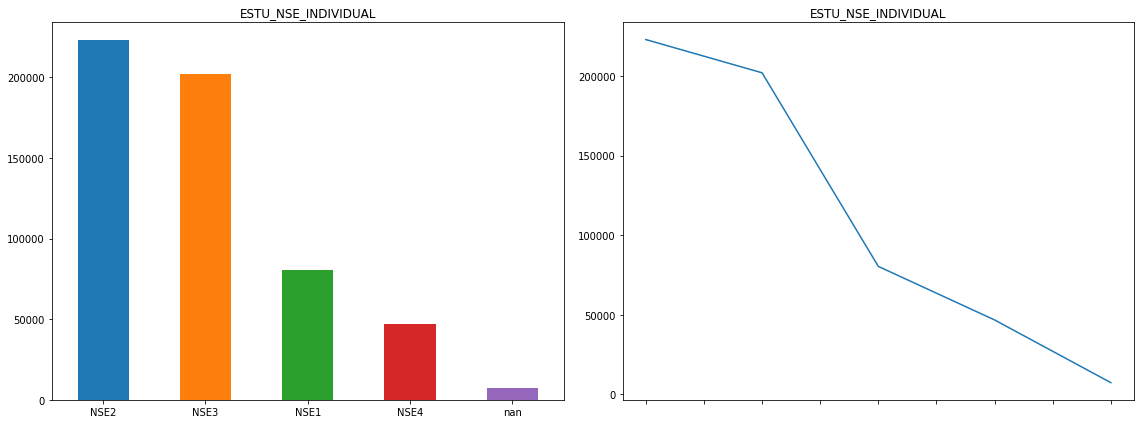

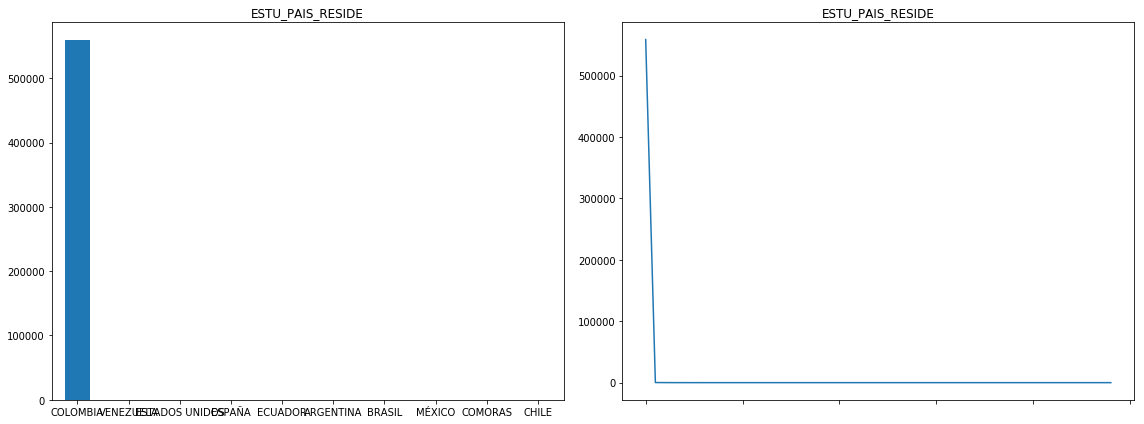

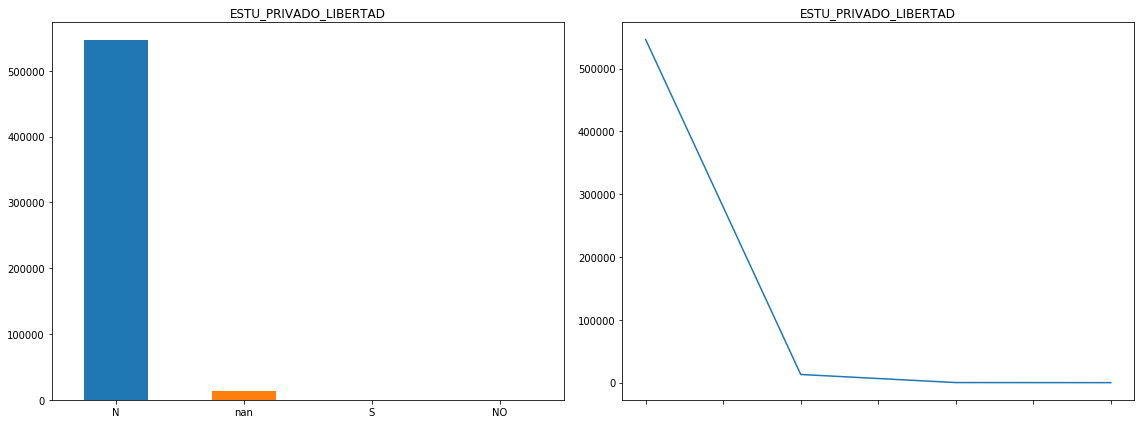

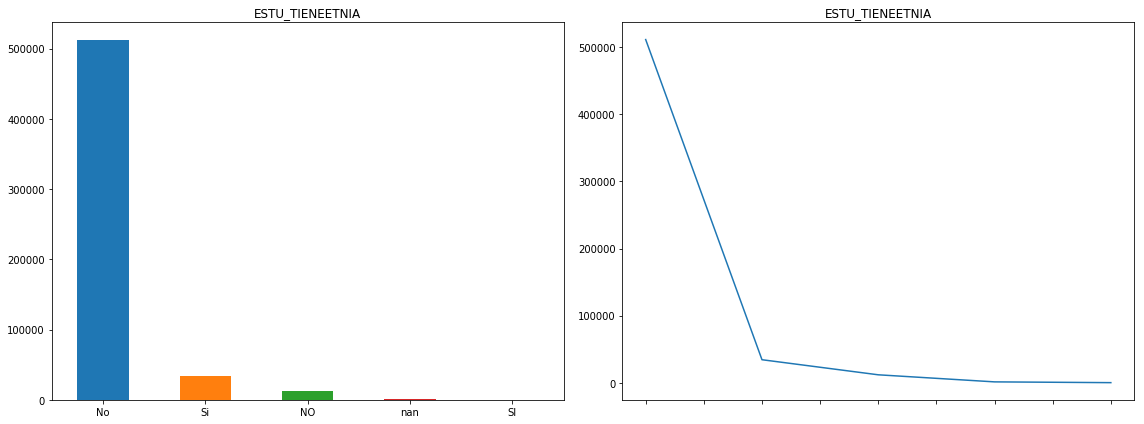

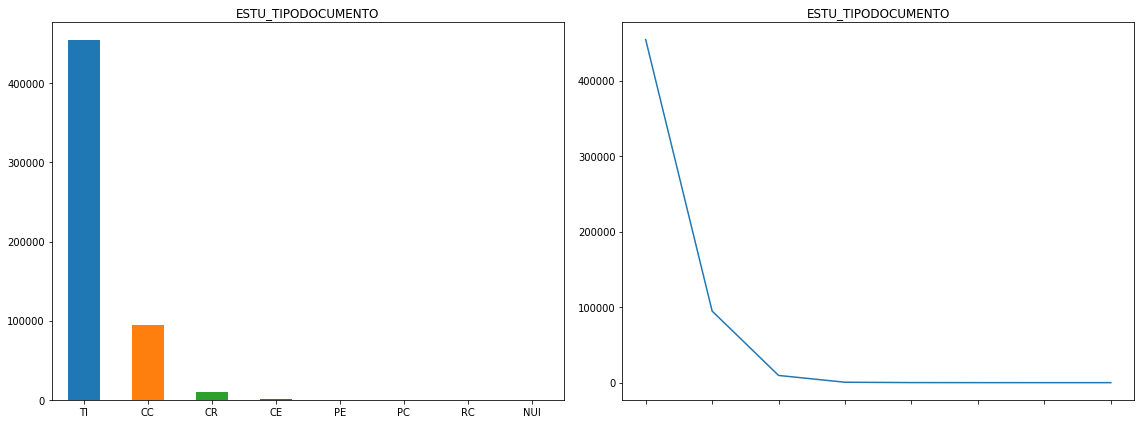

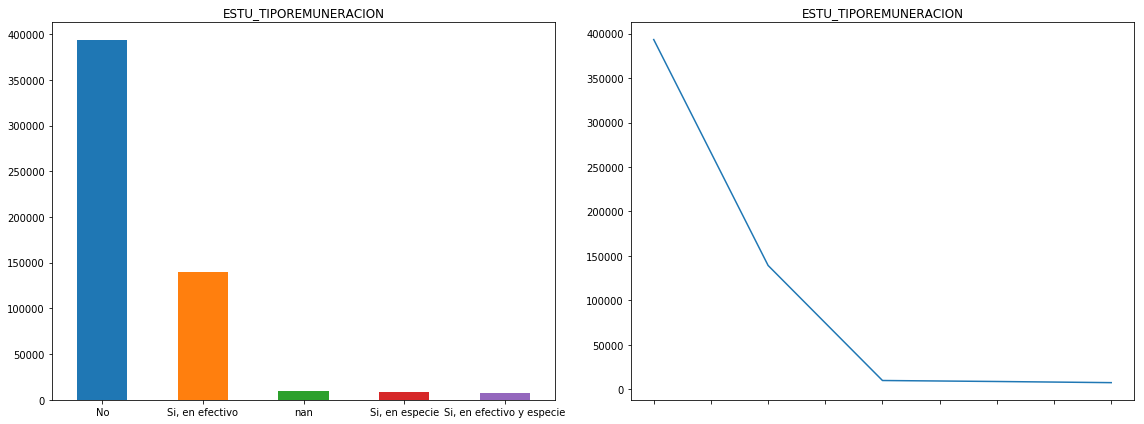

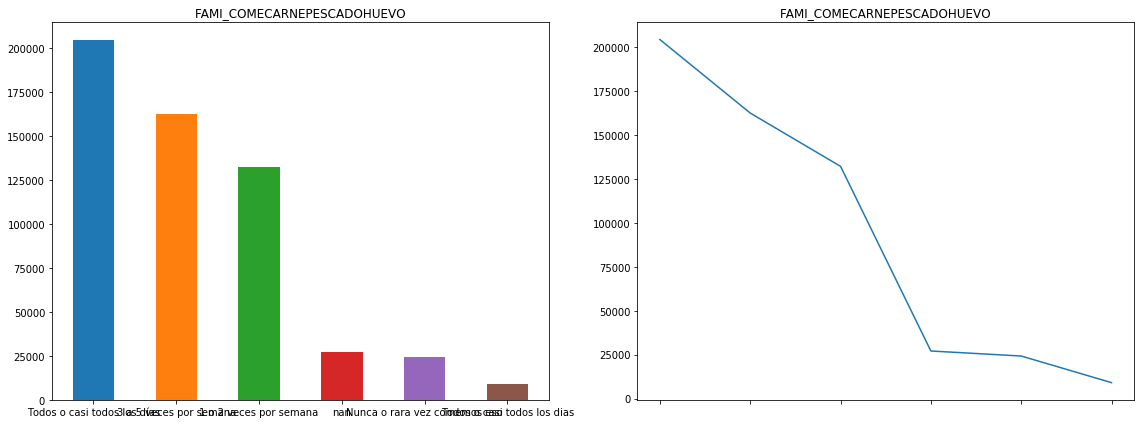

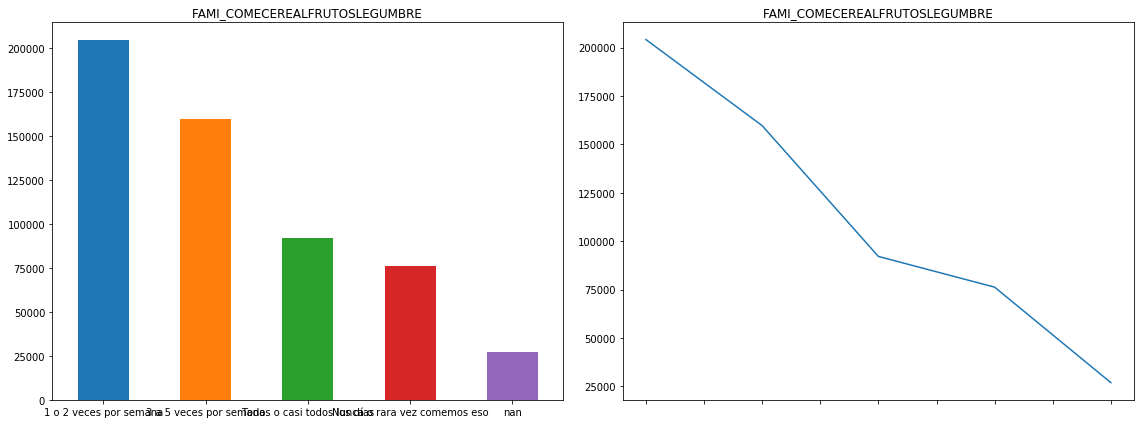

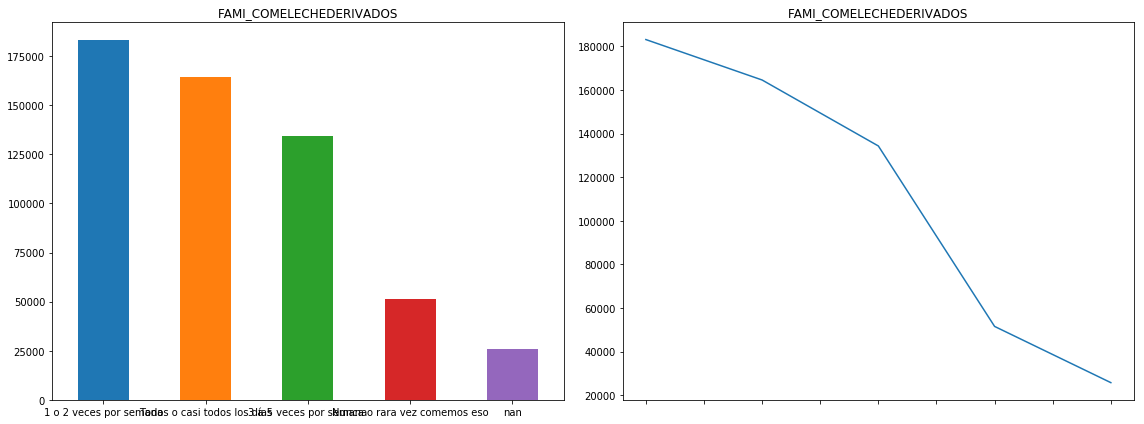

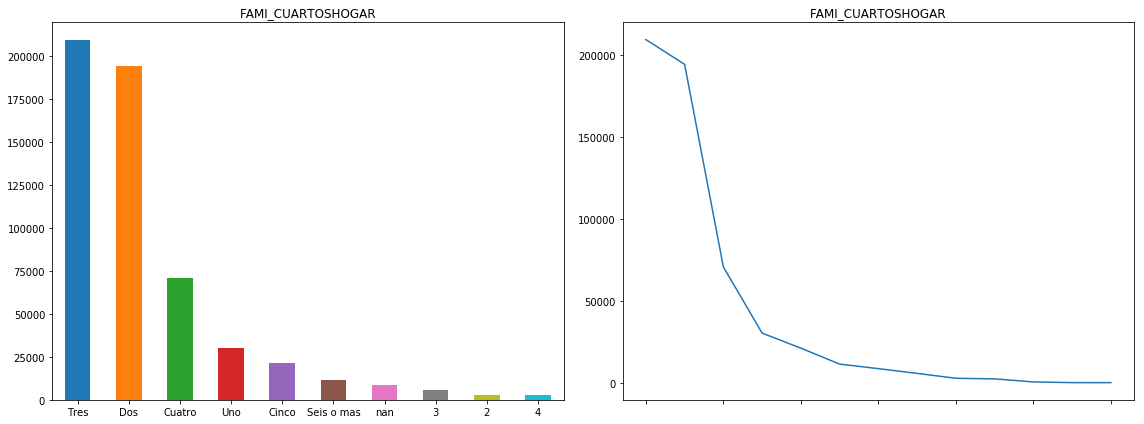

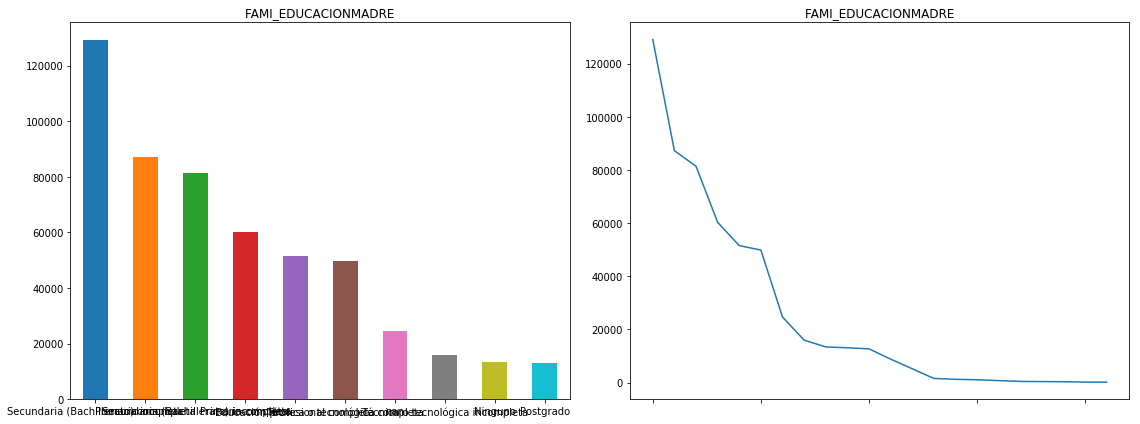

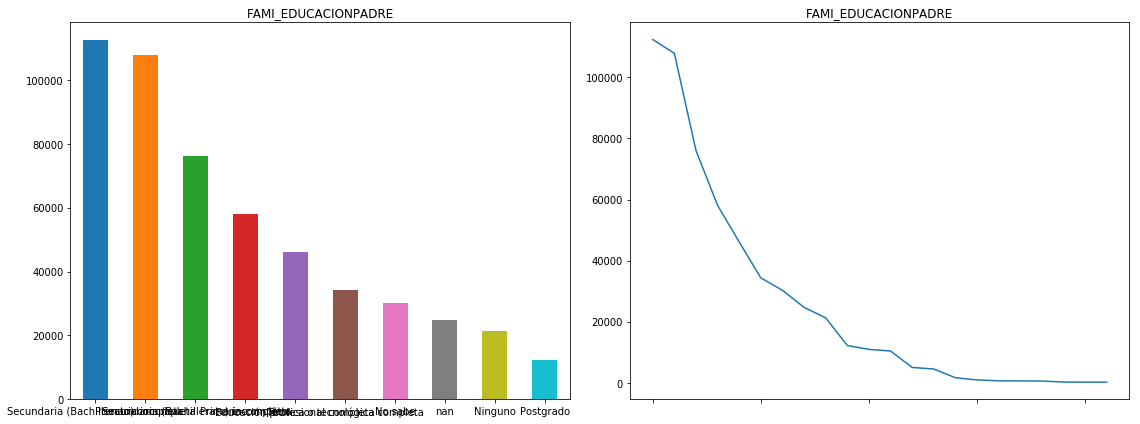

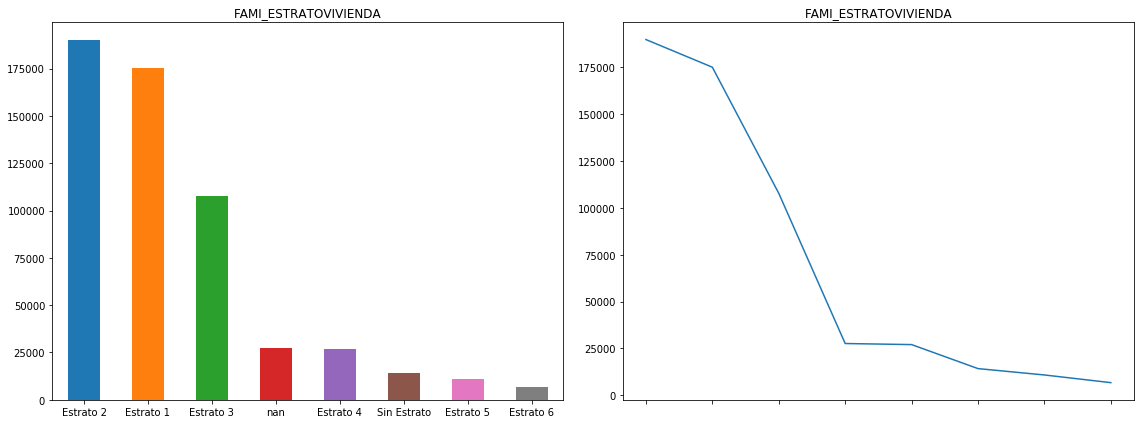

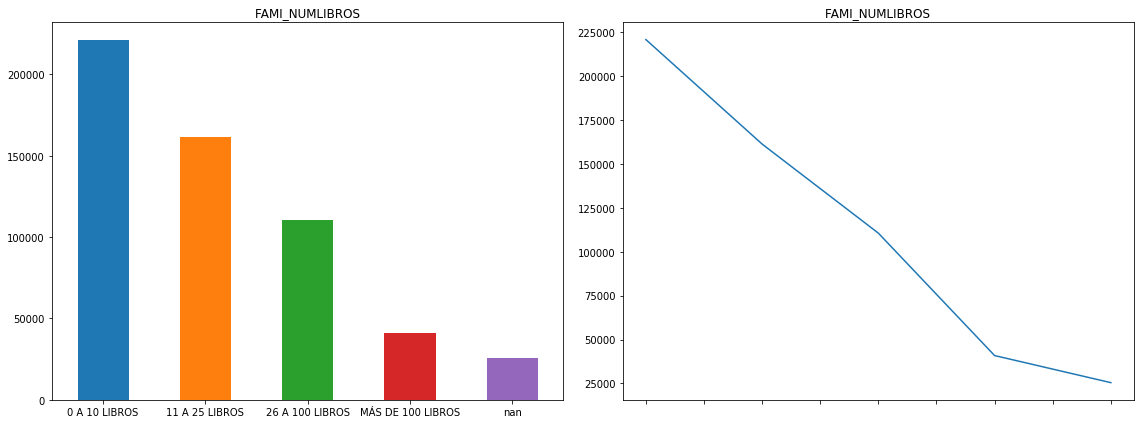

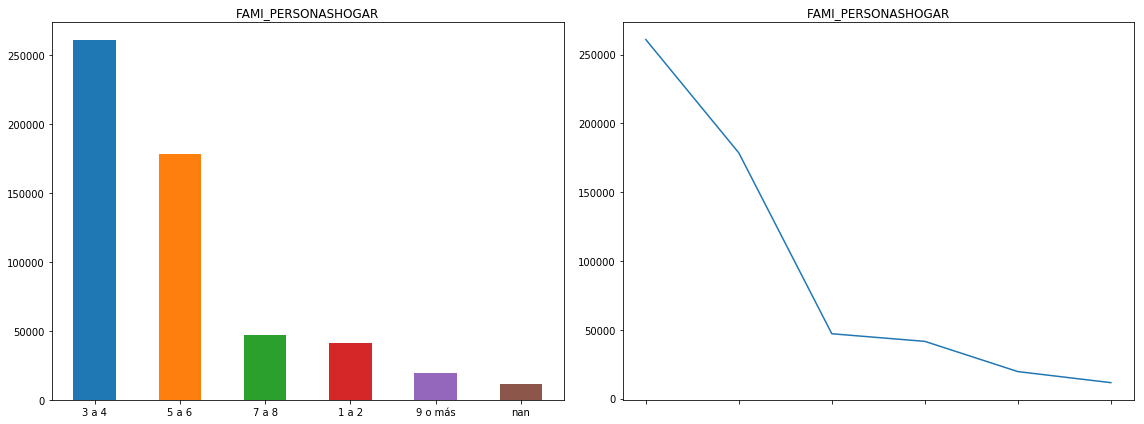

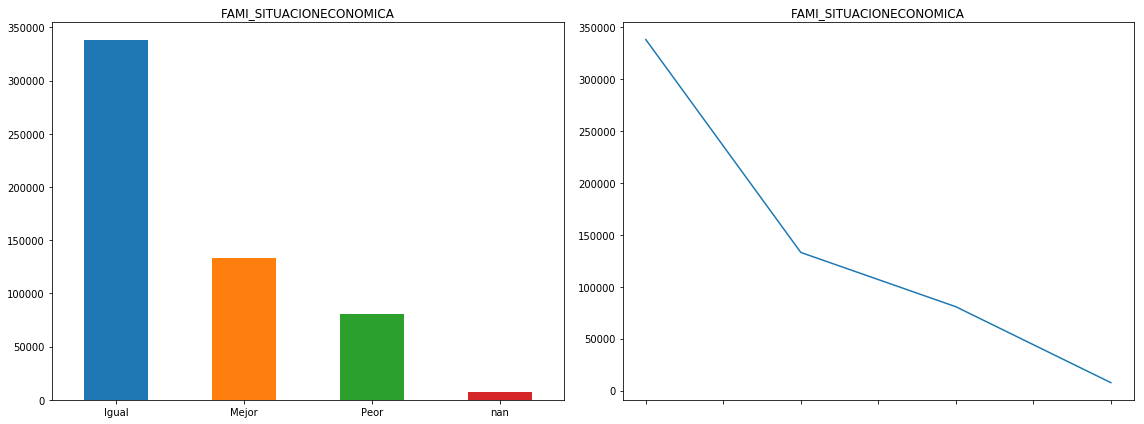

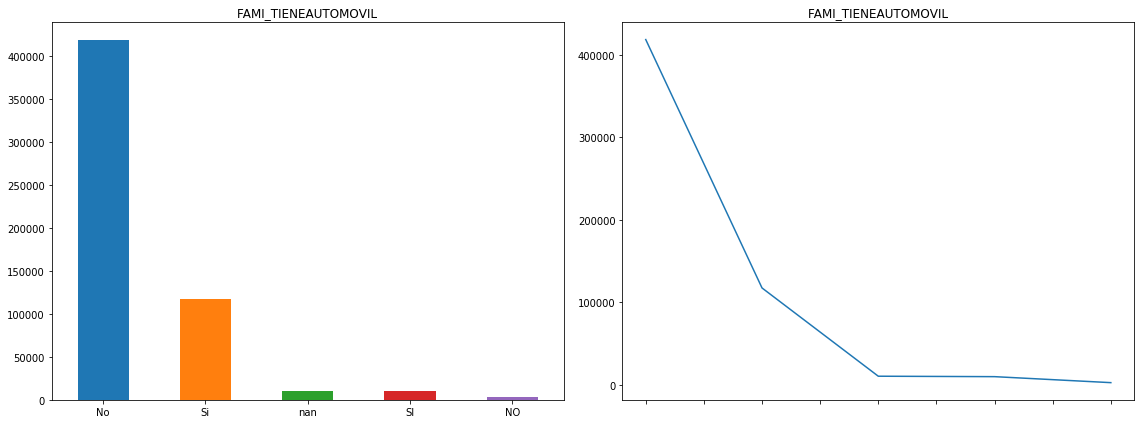

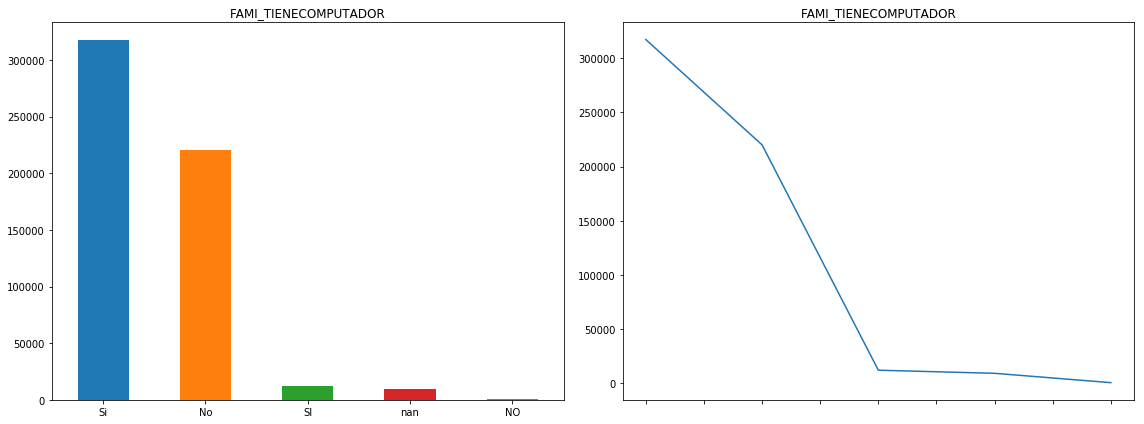

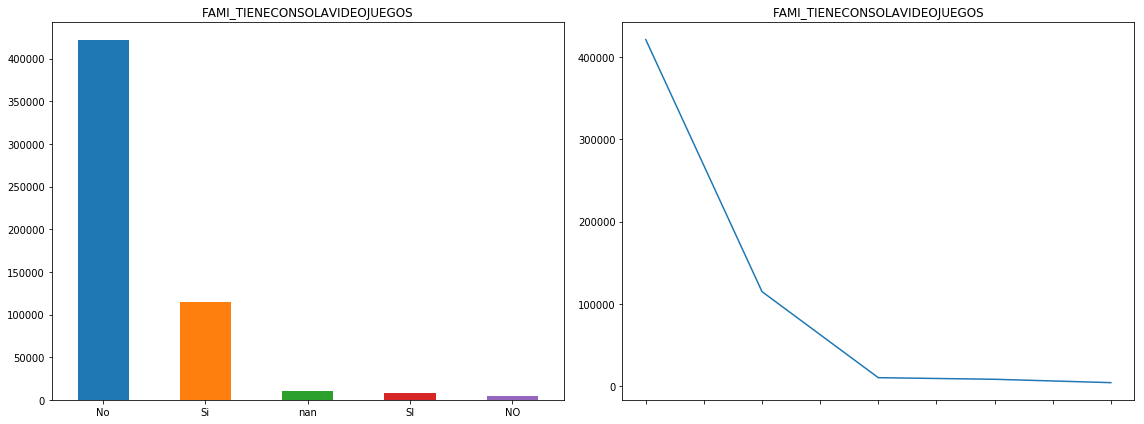

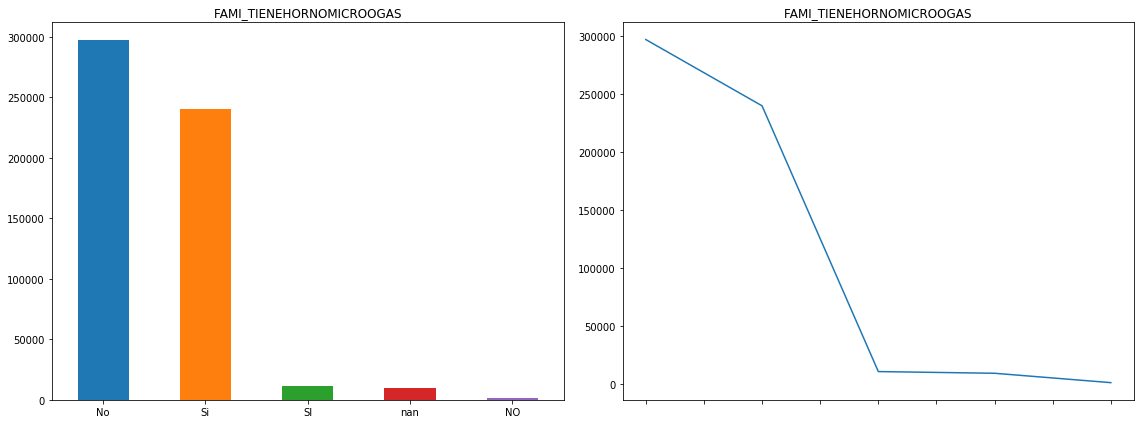

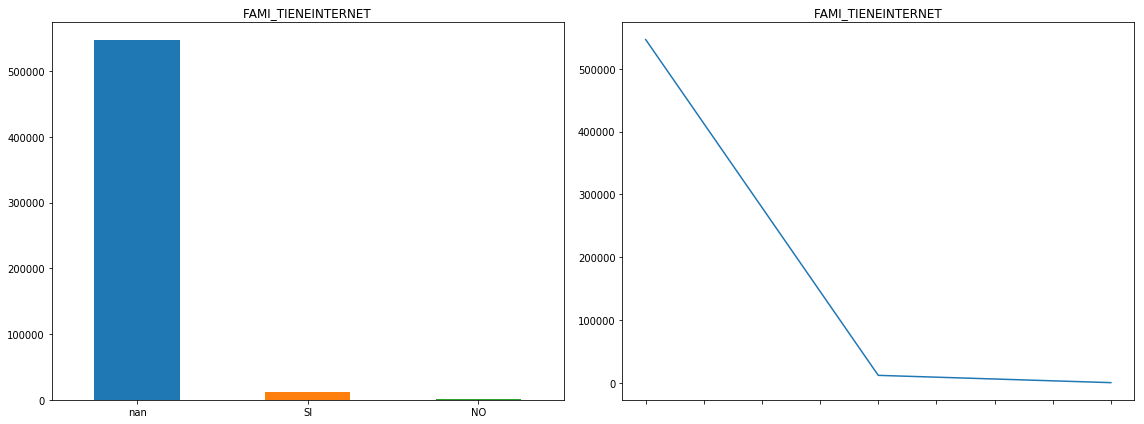

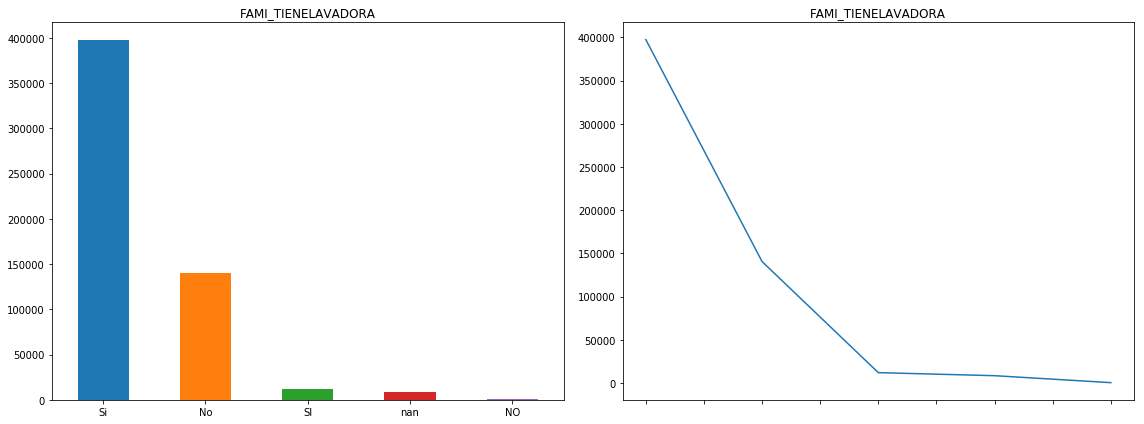

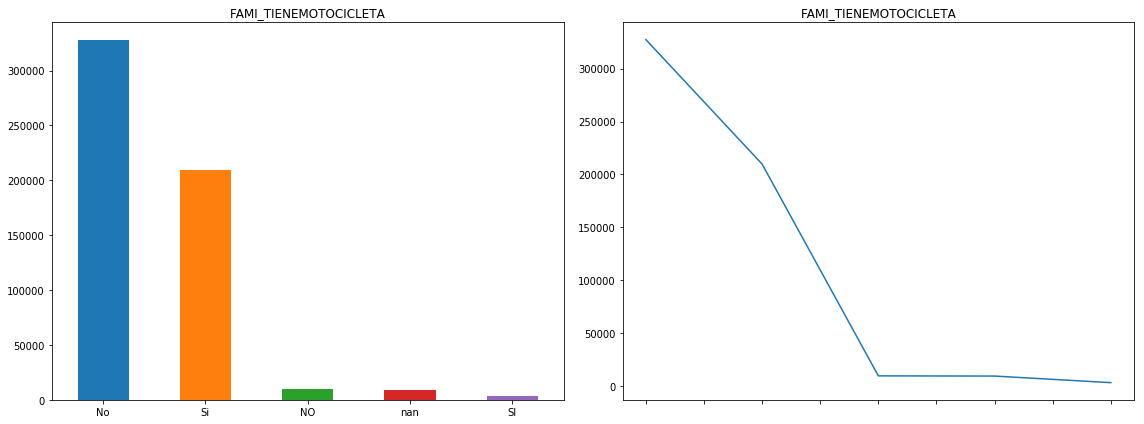

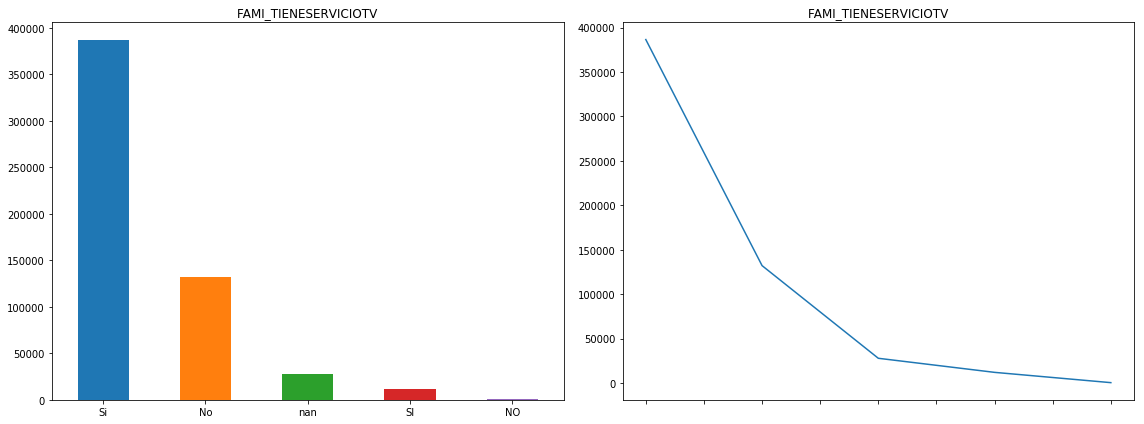

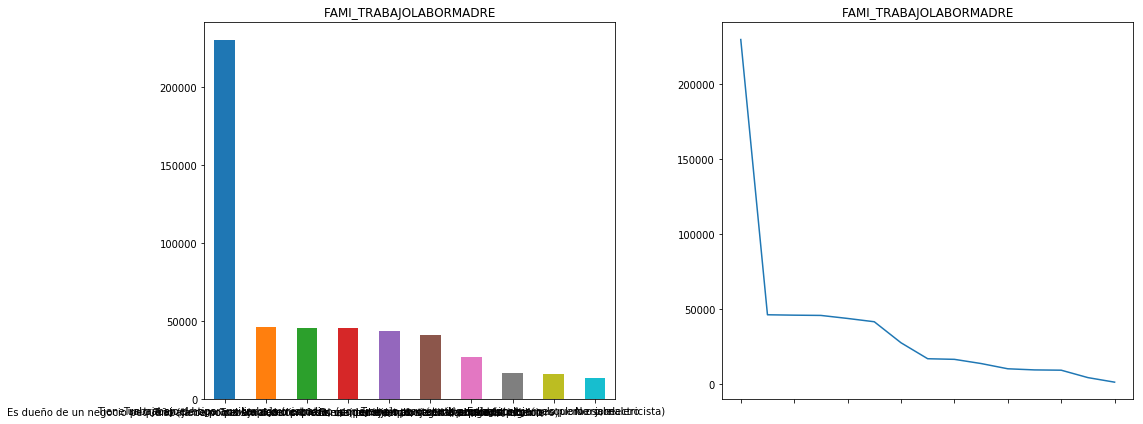

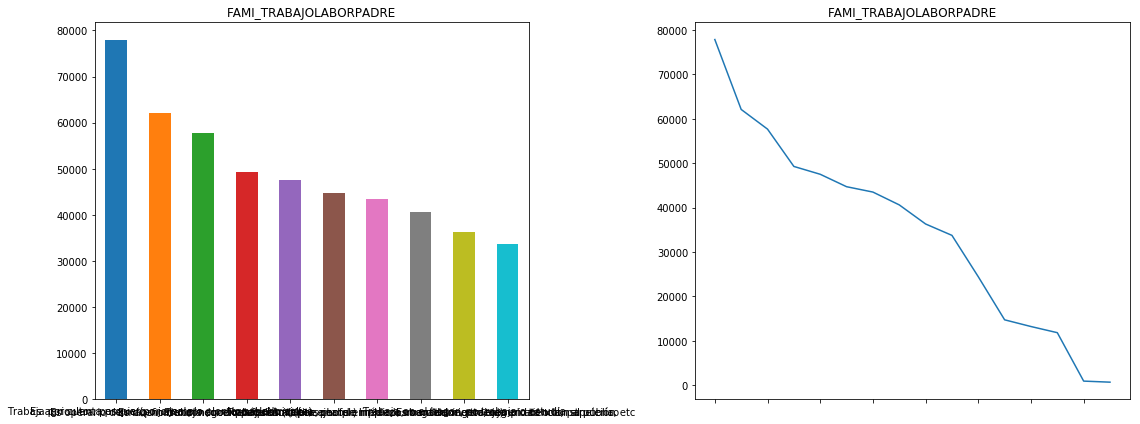

In [42]:
# Nominal

nominal_icfes = icfes.select_dtypes(exclude=numerics)

def plot_nominal(df):
    c = 2
    r = 1
    for i in df.columns:
        data = df[i].value_counts(dropna=False)
                                        
        fig, axes = plt.subplots(r, c, figsize=(8*c, 6*r))
        axes = np.array(axes).reshape(-1, c)
    
        for axe in axes:
            # Plot top 10 frequent values
            data.iloc[:10].plot.bar(ax=axe[0], title=i, rot='0')
            
            data.plot(ax=axe[1], title=i)
                    
        plt.tight_layout()
    
        plt.show()
                    
plot_nominal(nominal_icfes)

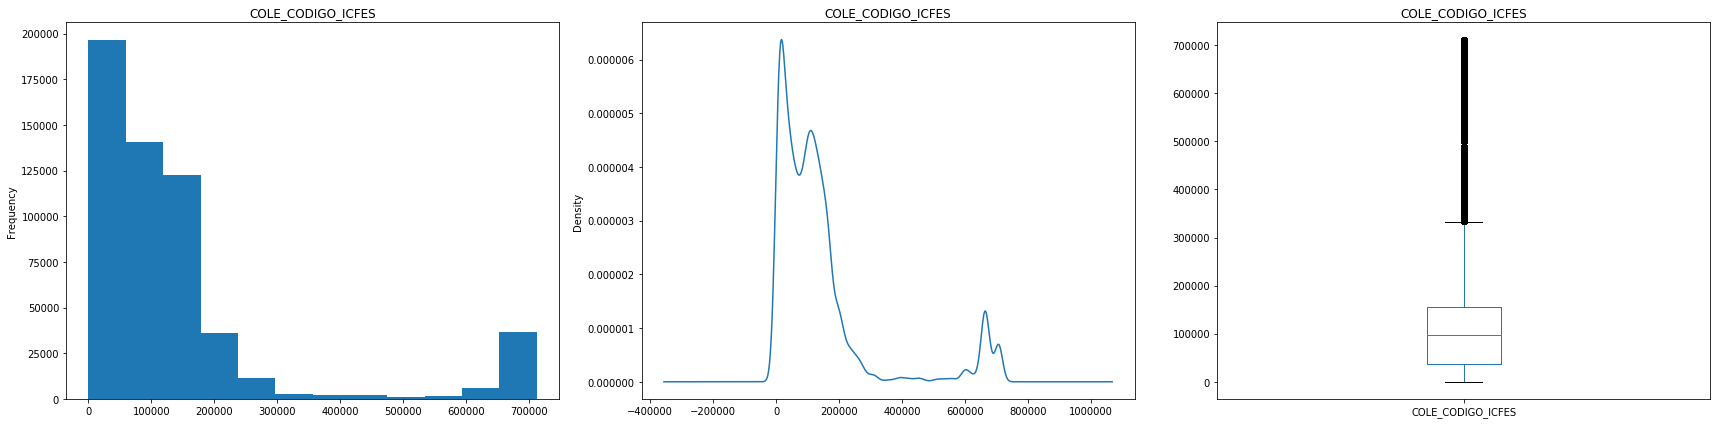

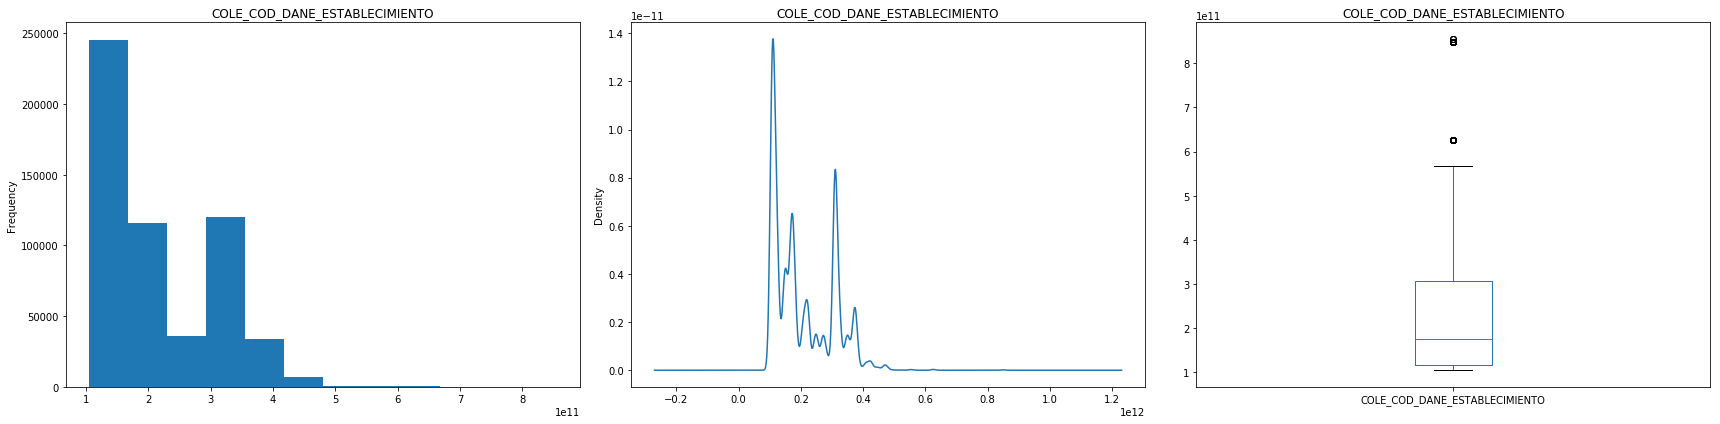

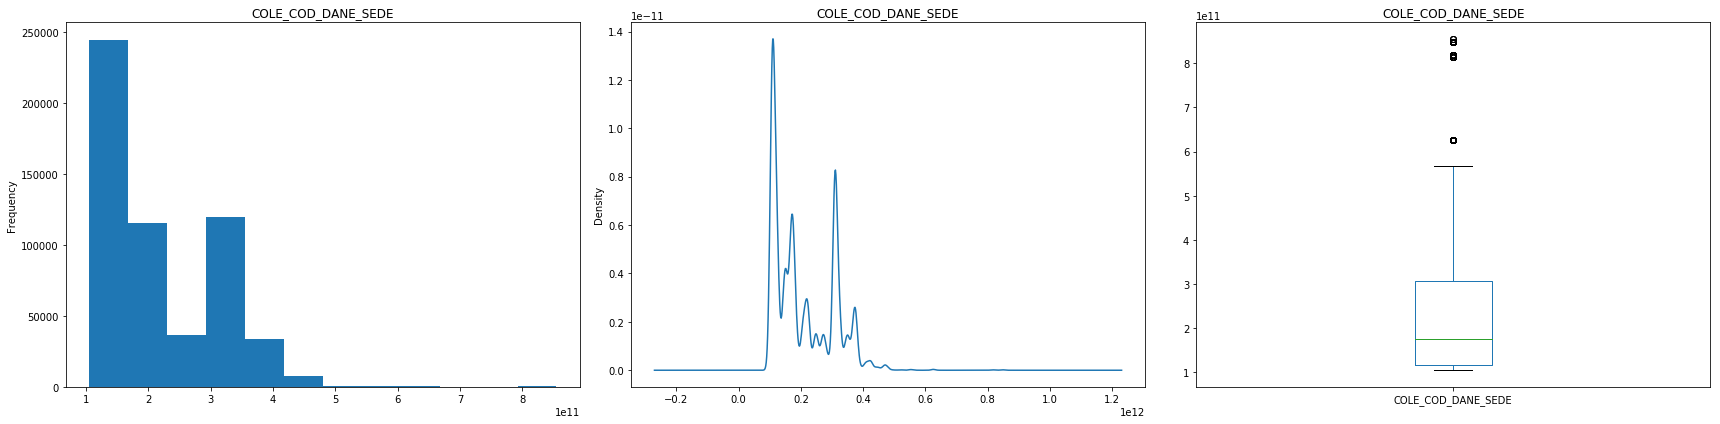

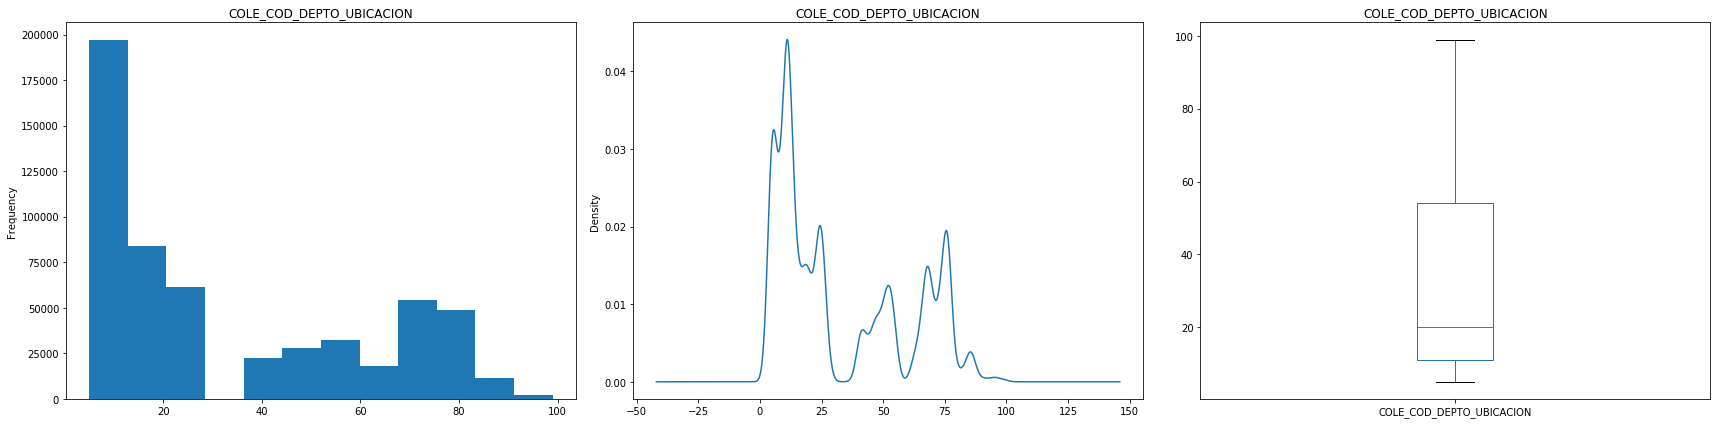

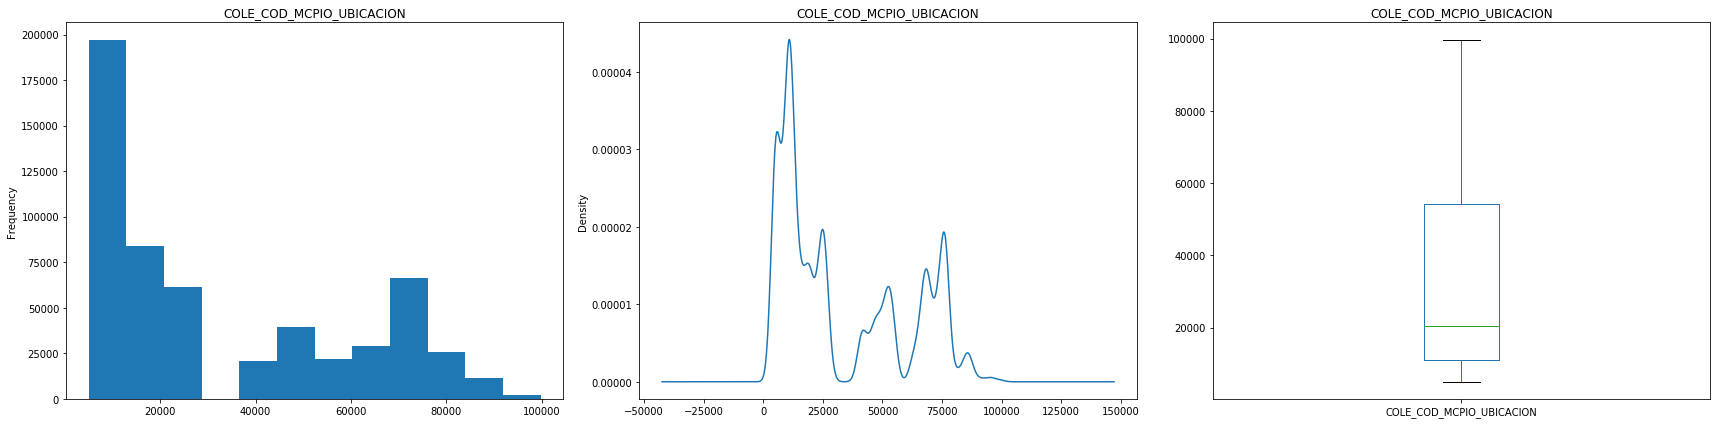

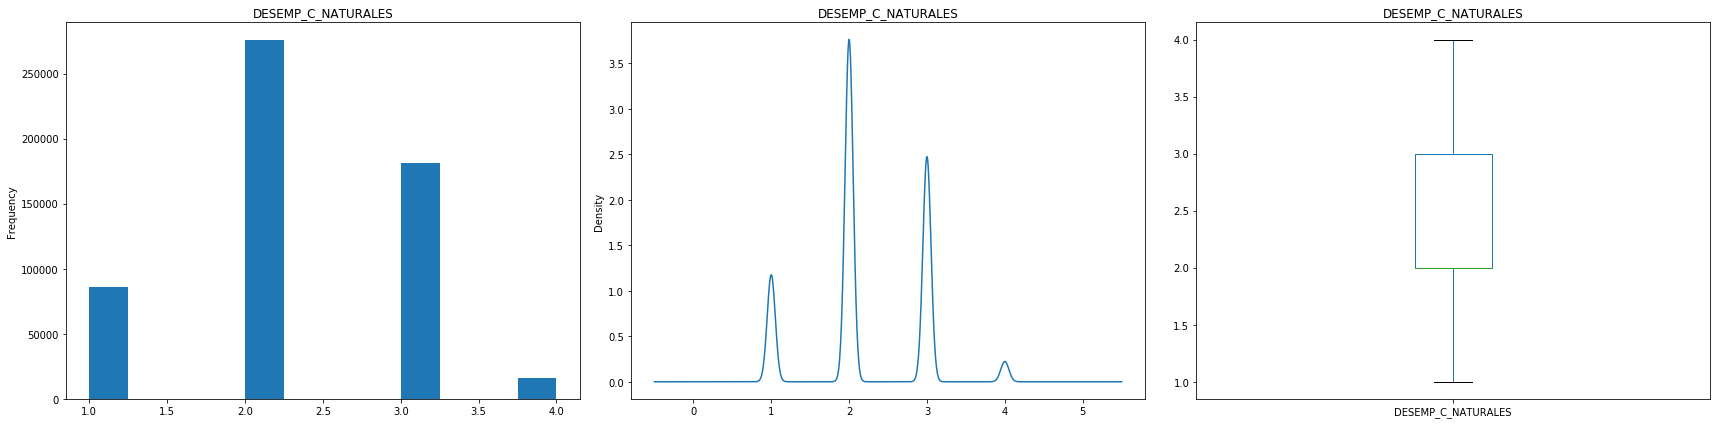

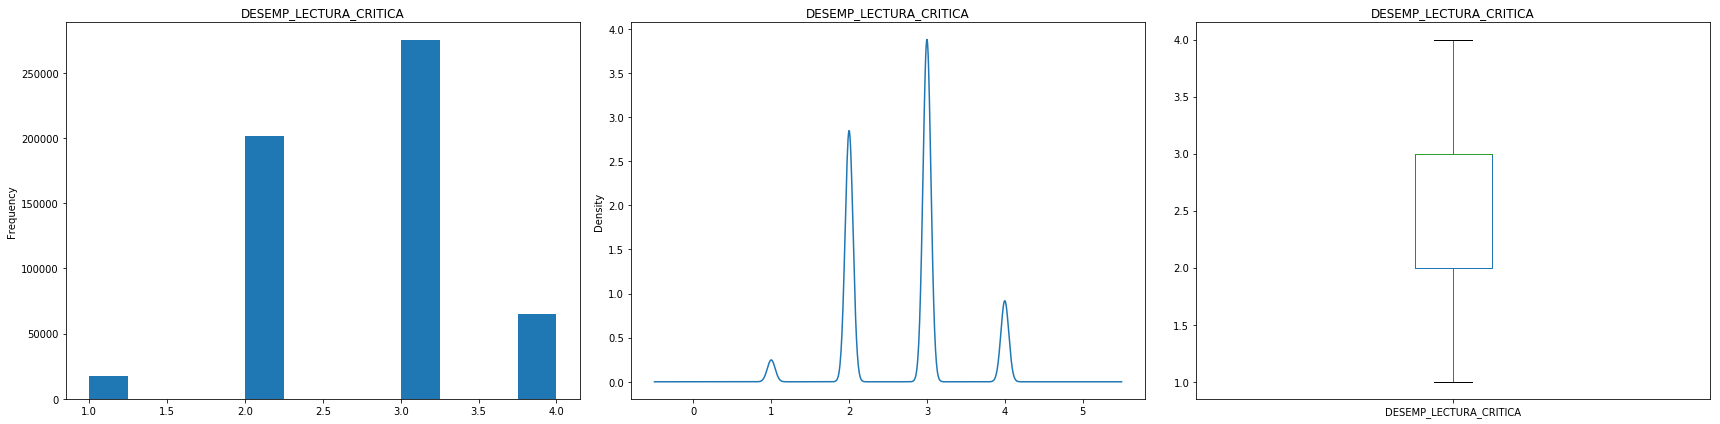

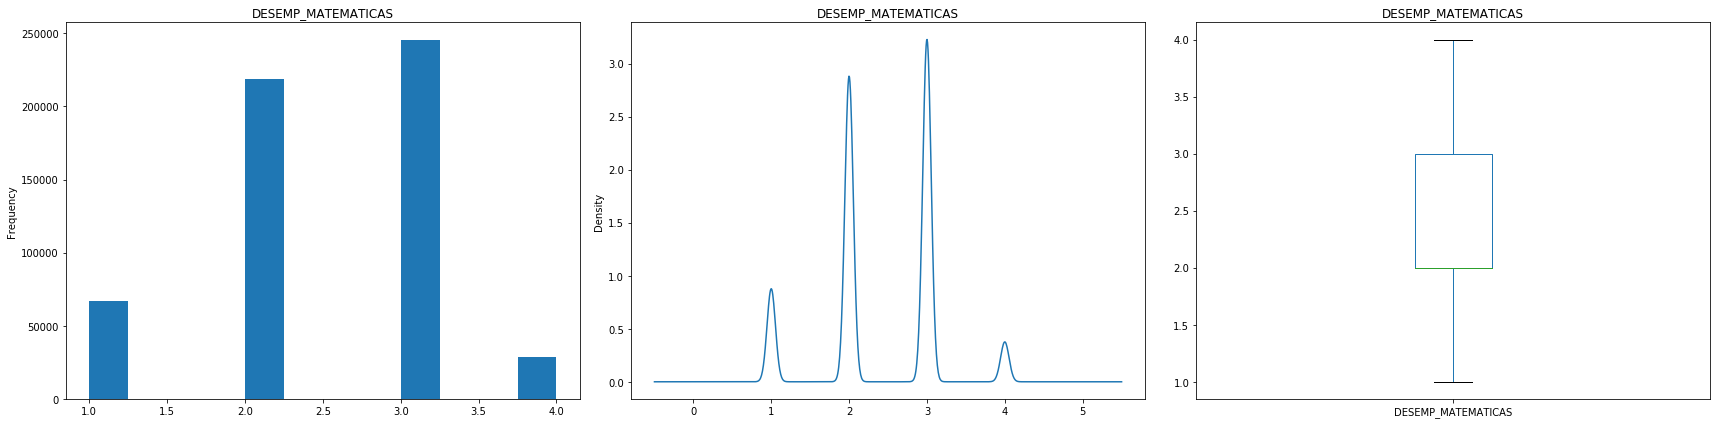

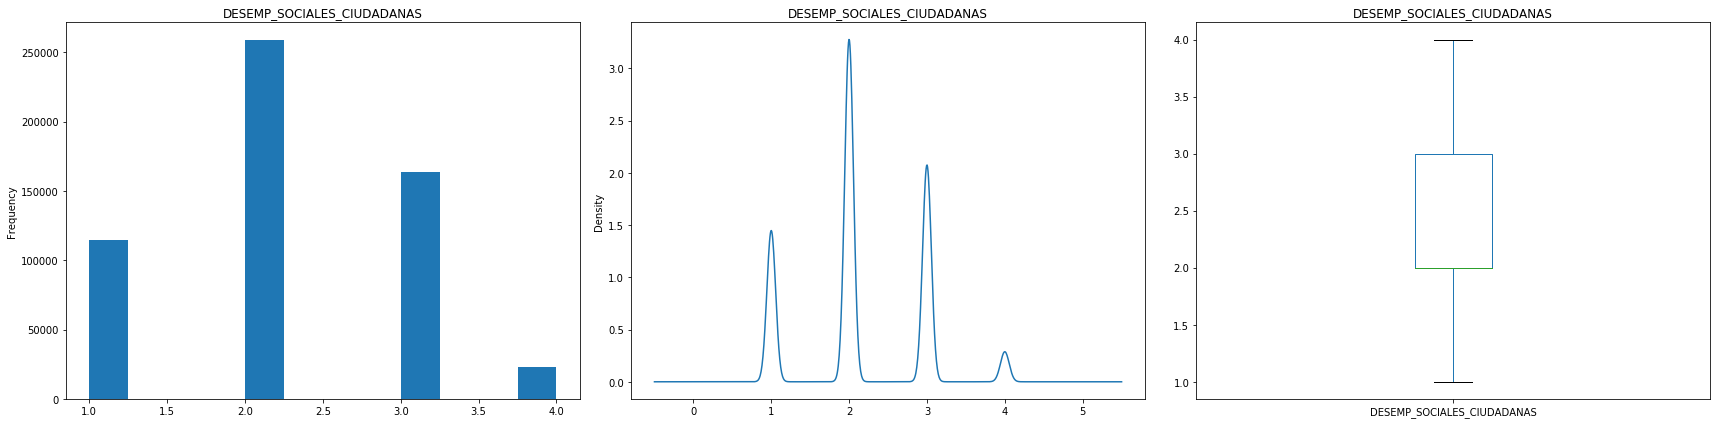

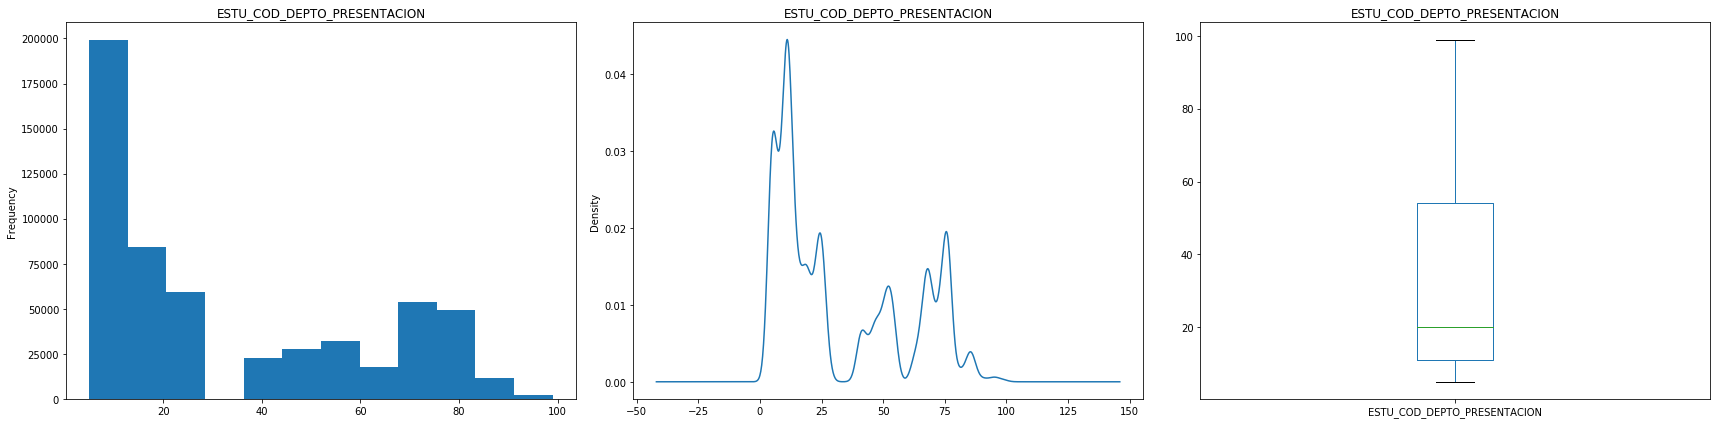

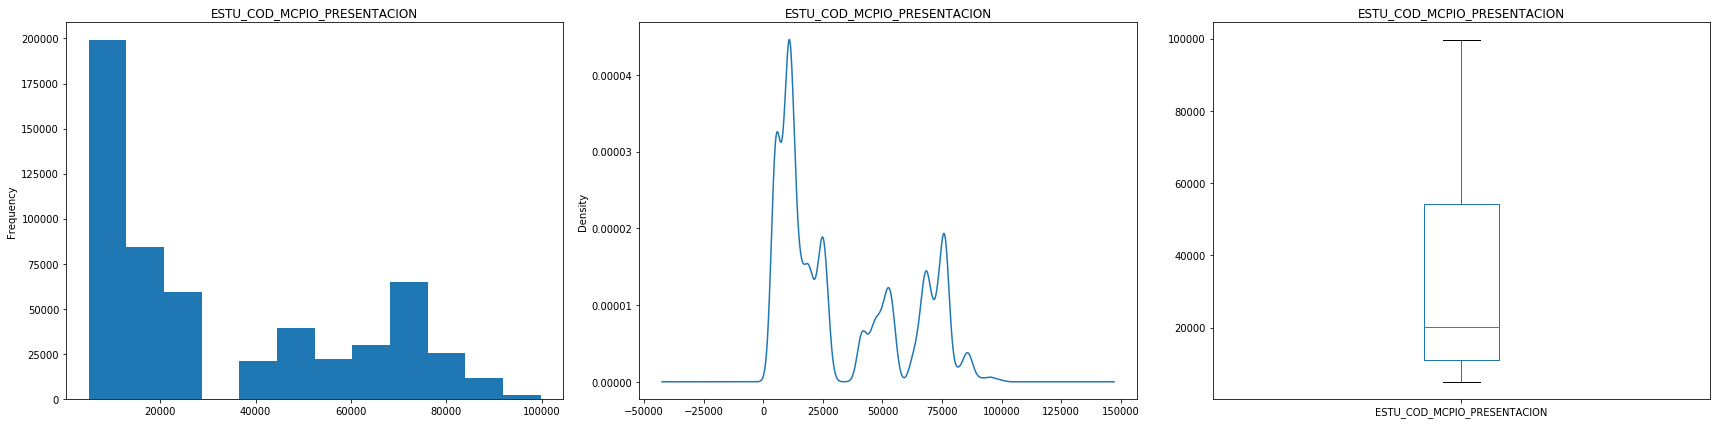

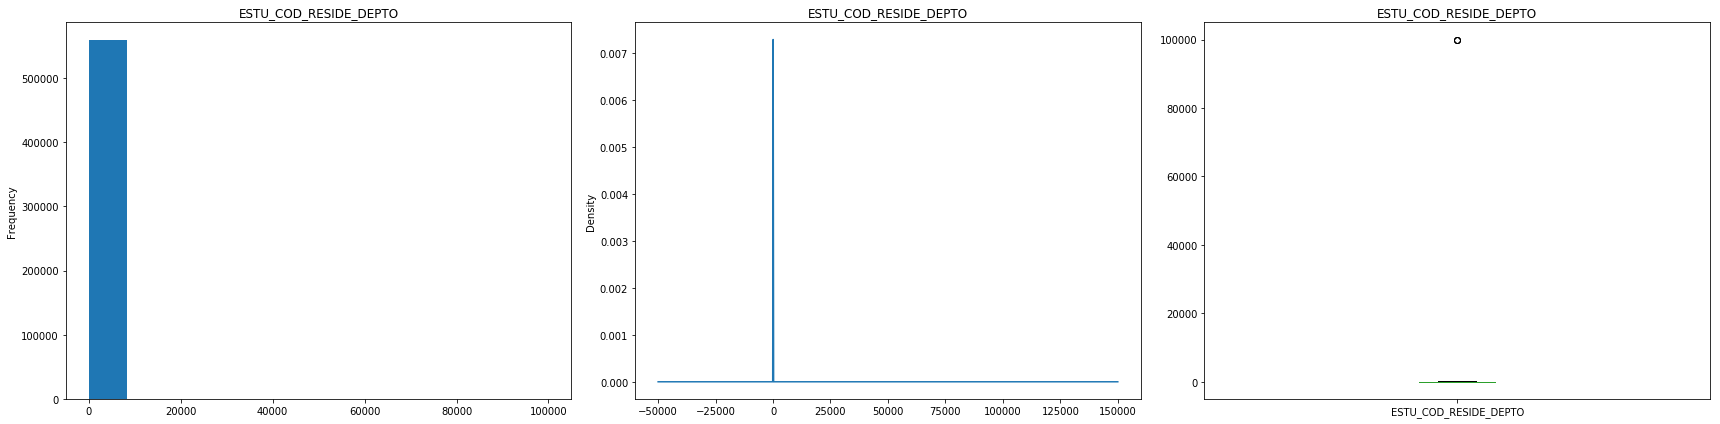

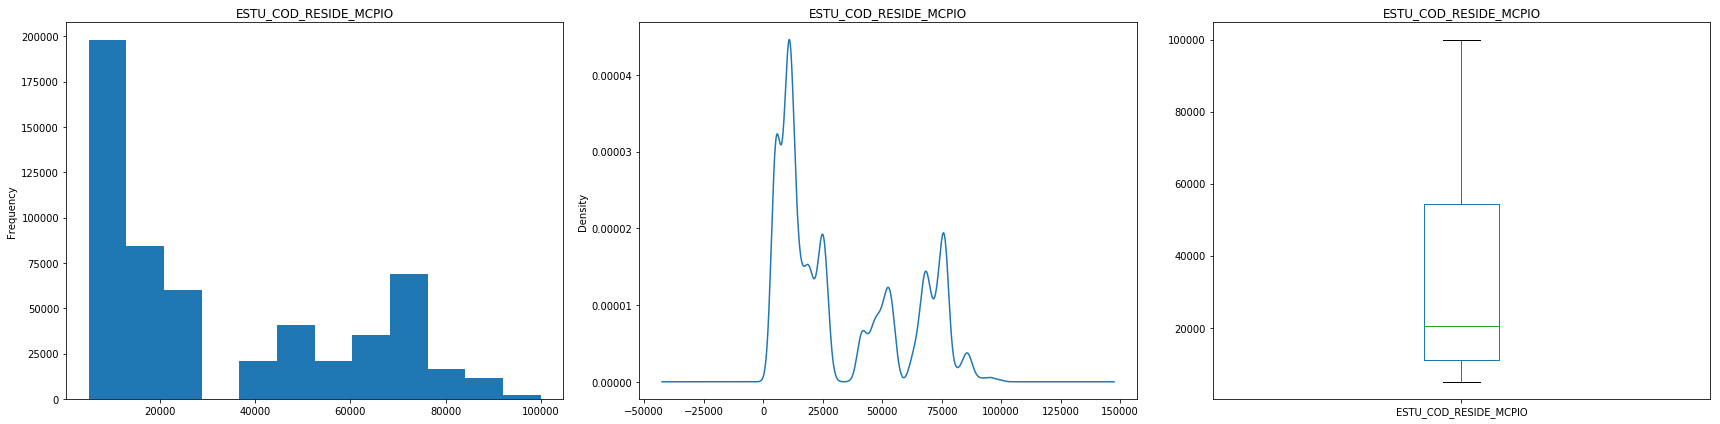

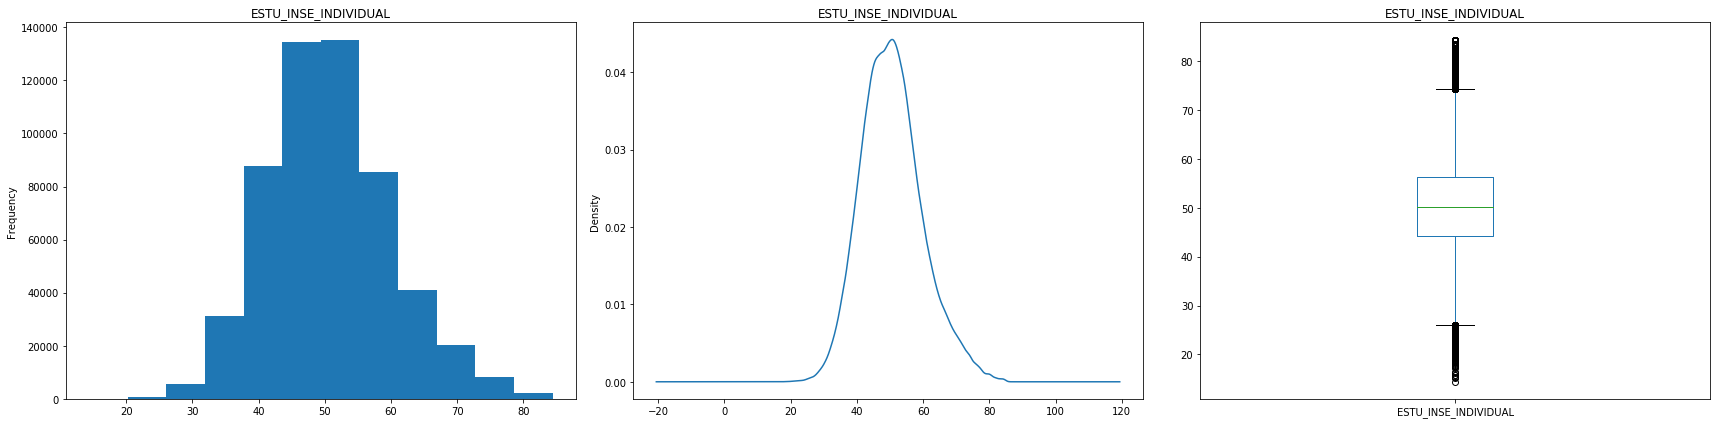

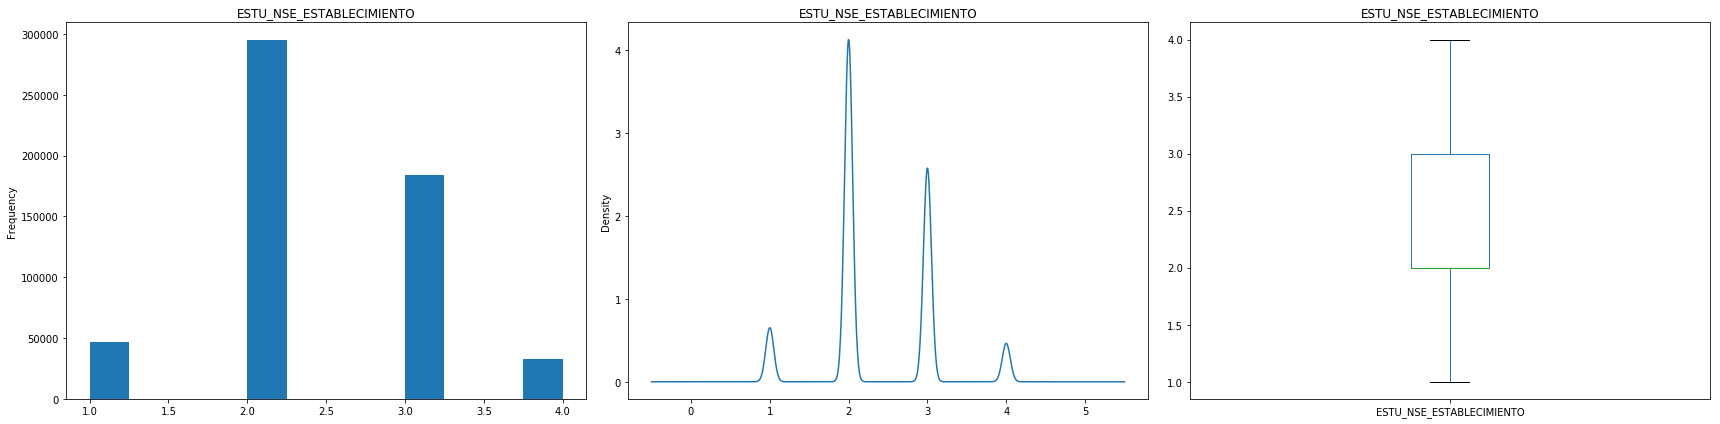

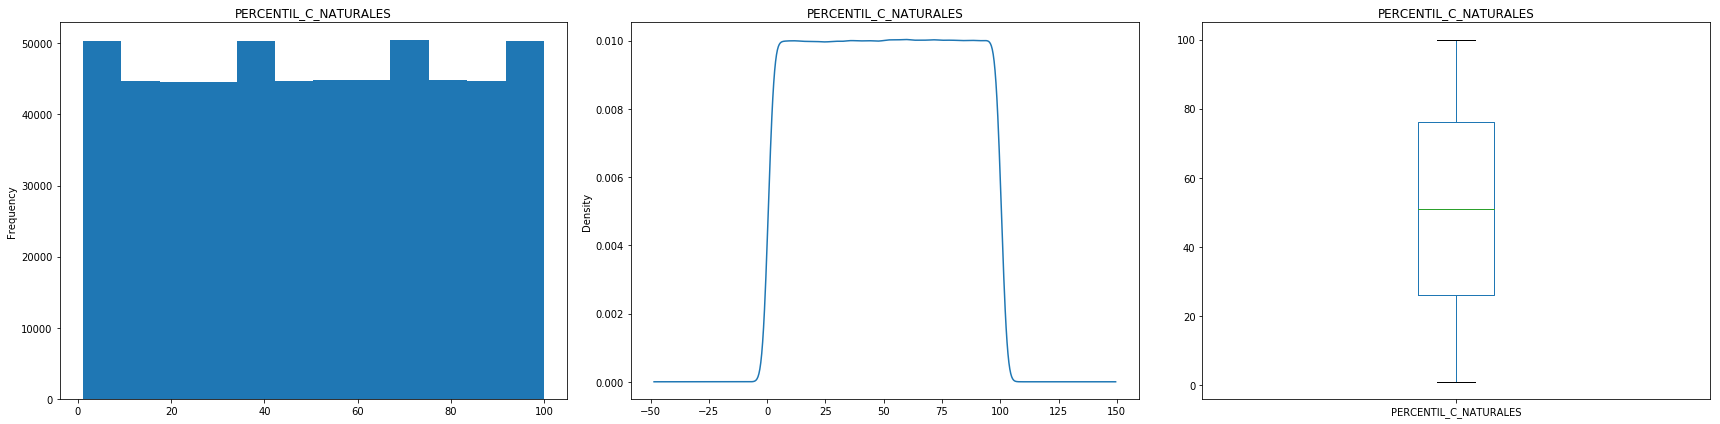

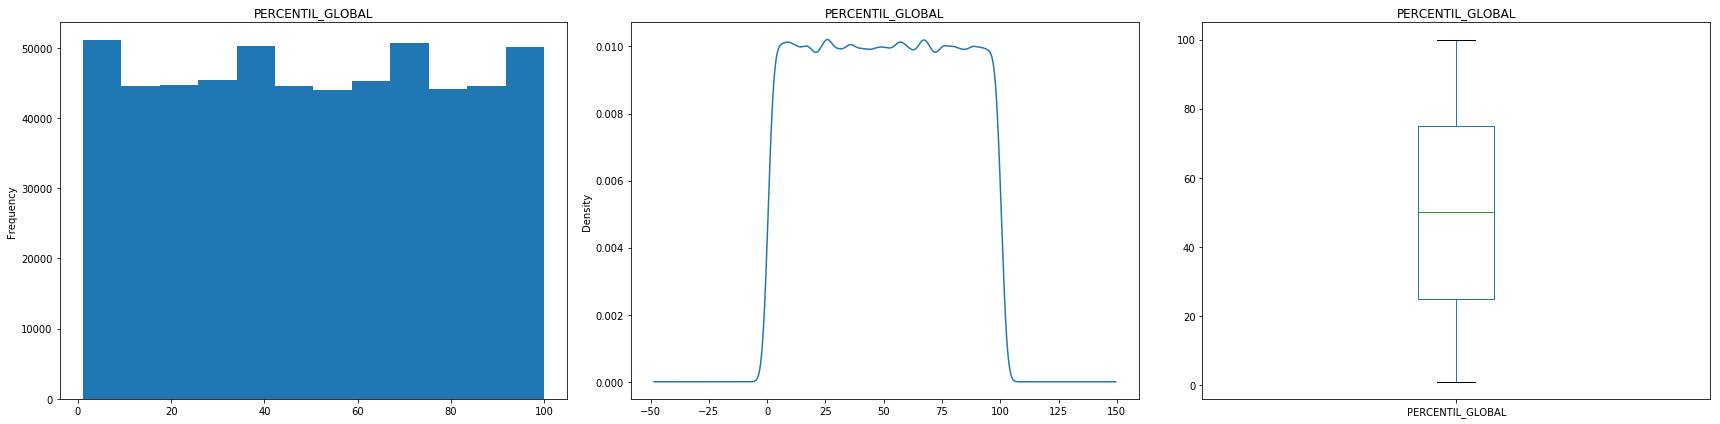

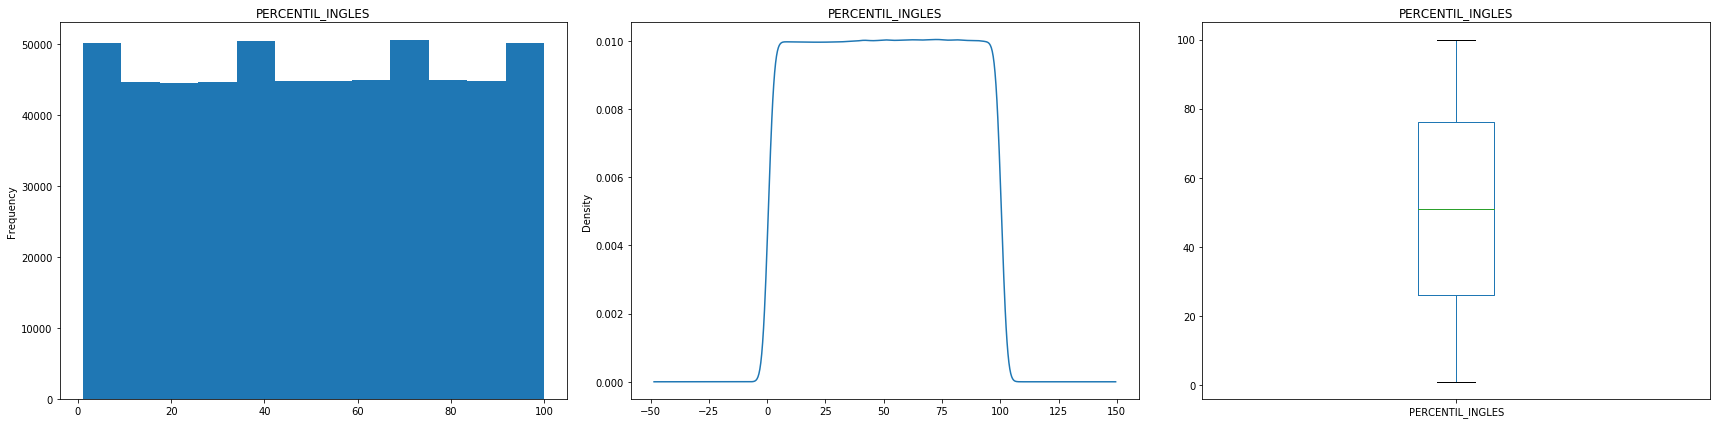

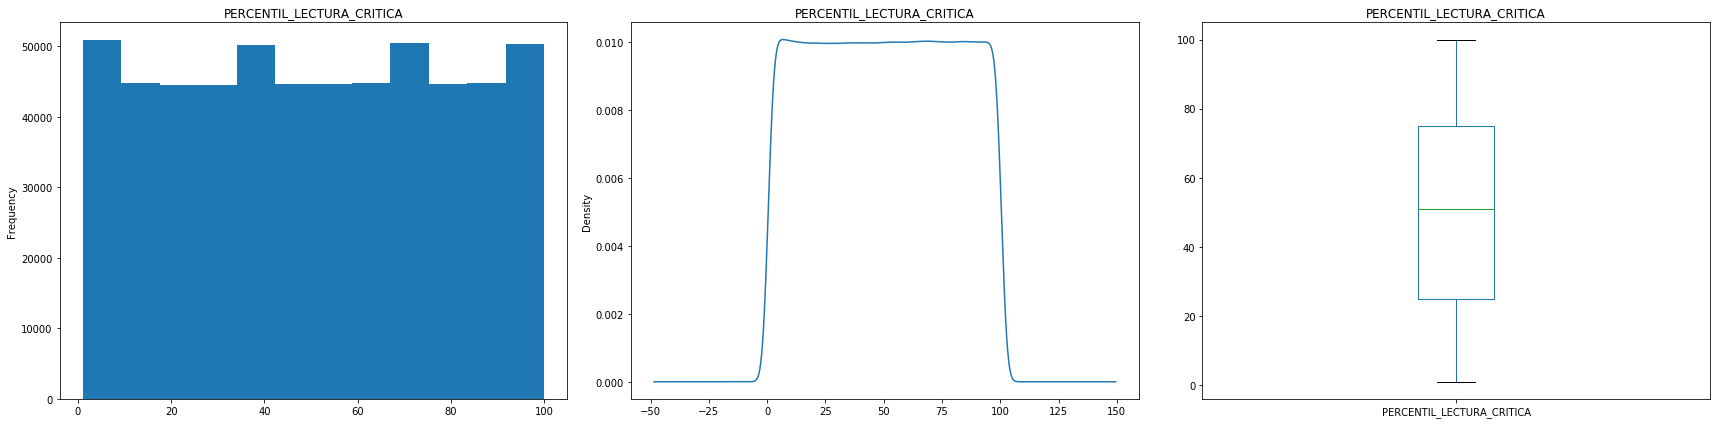

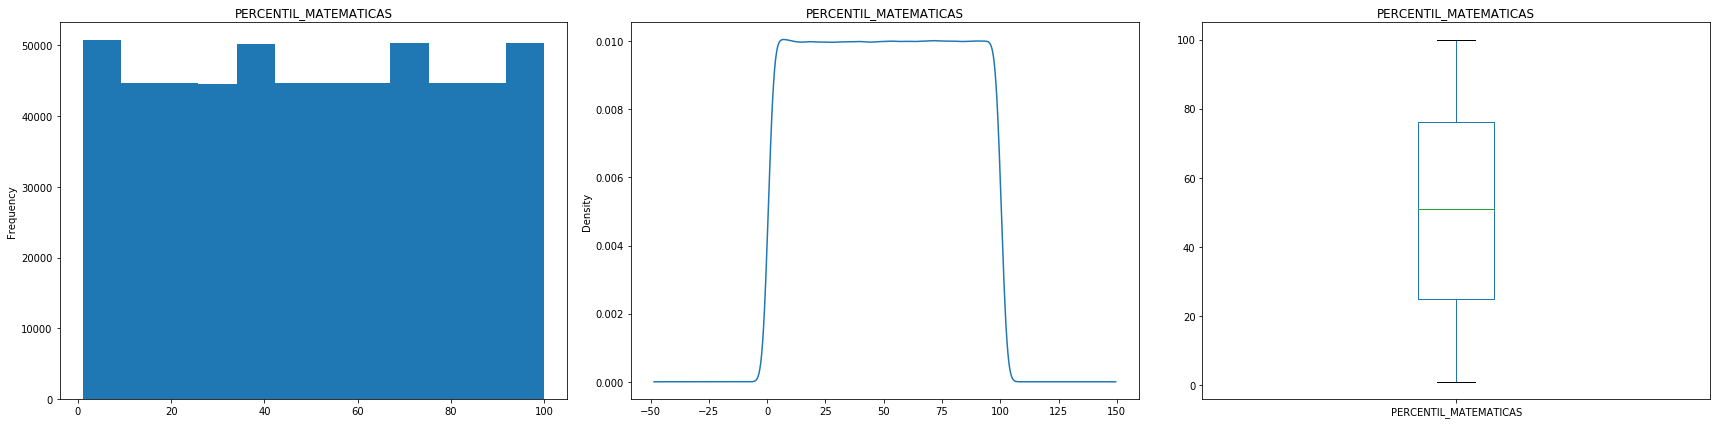

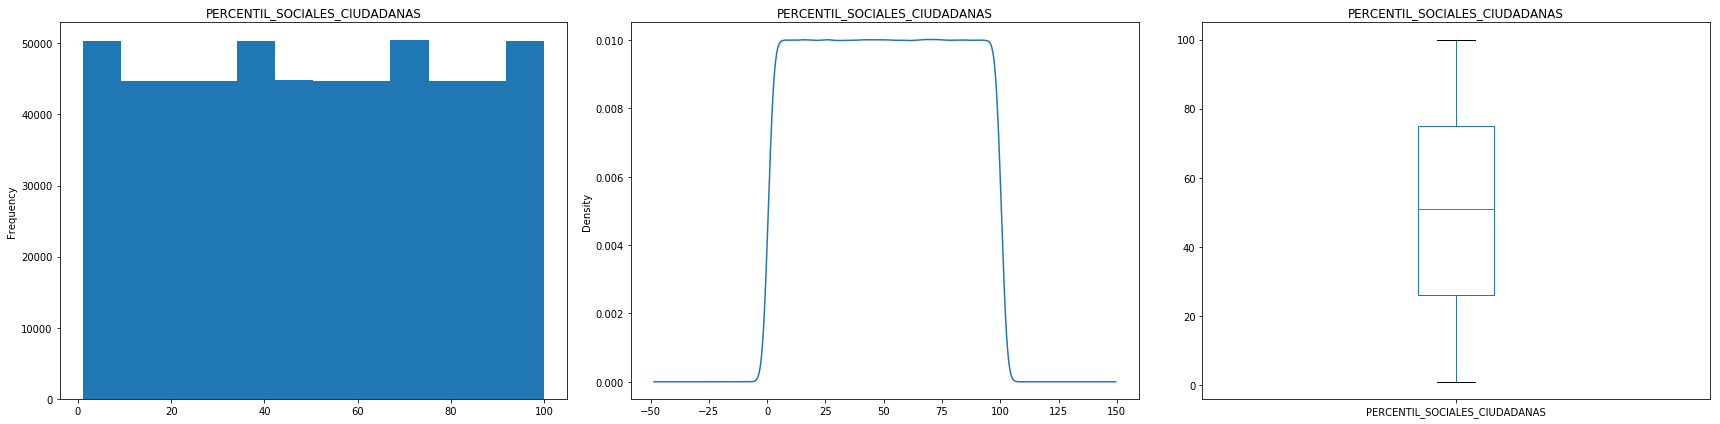

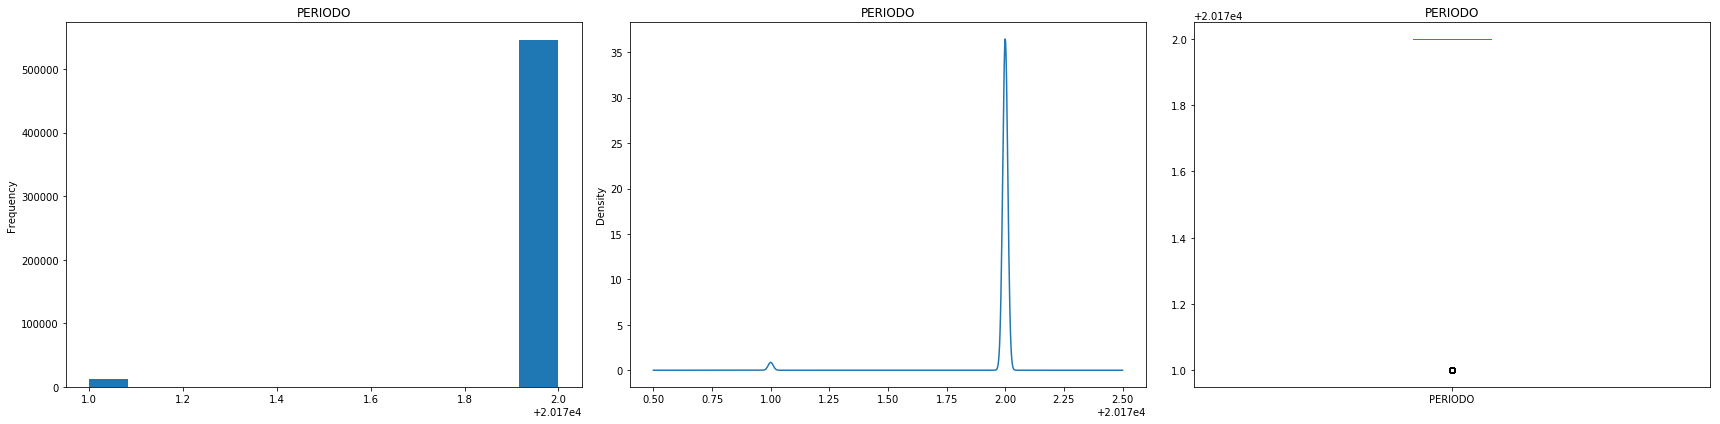

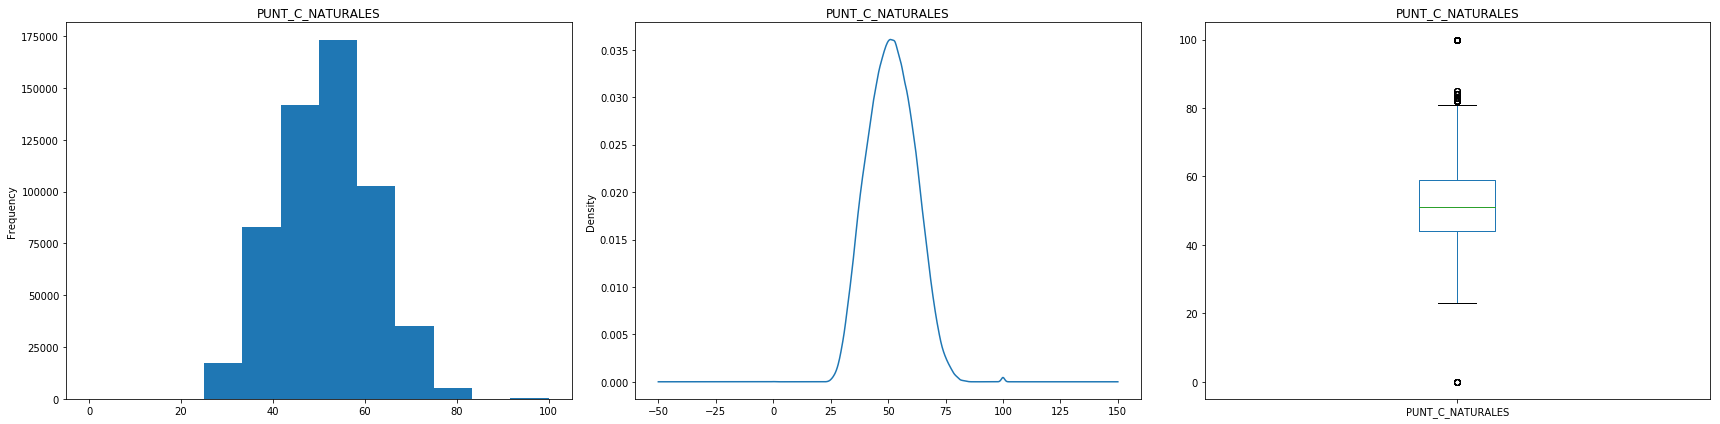

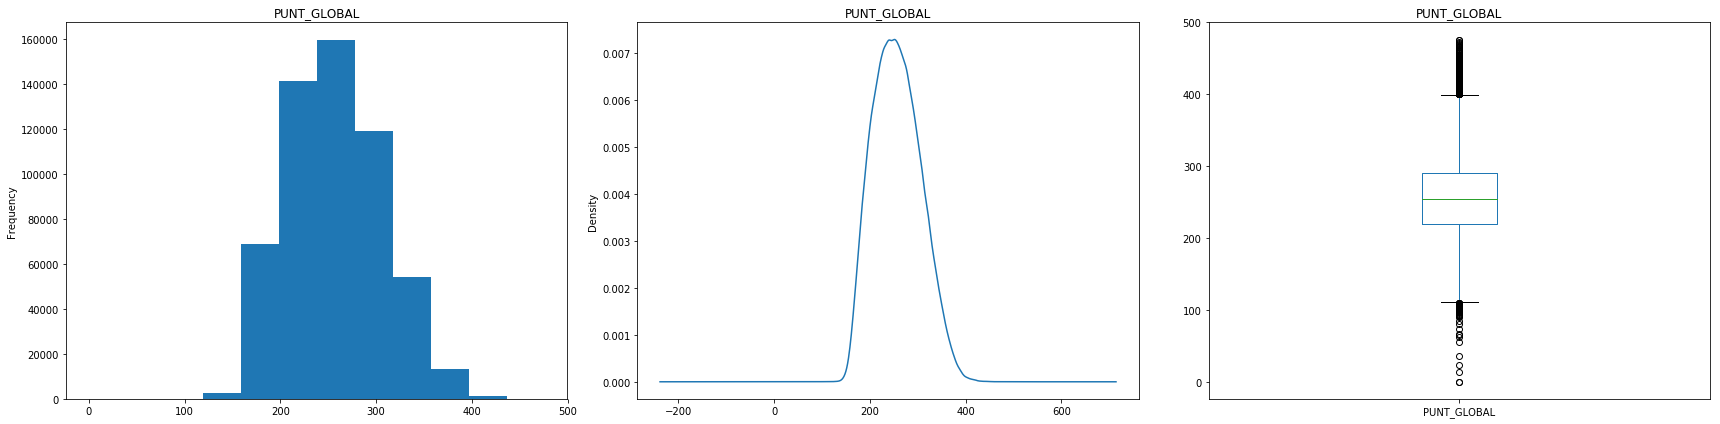

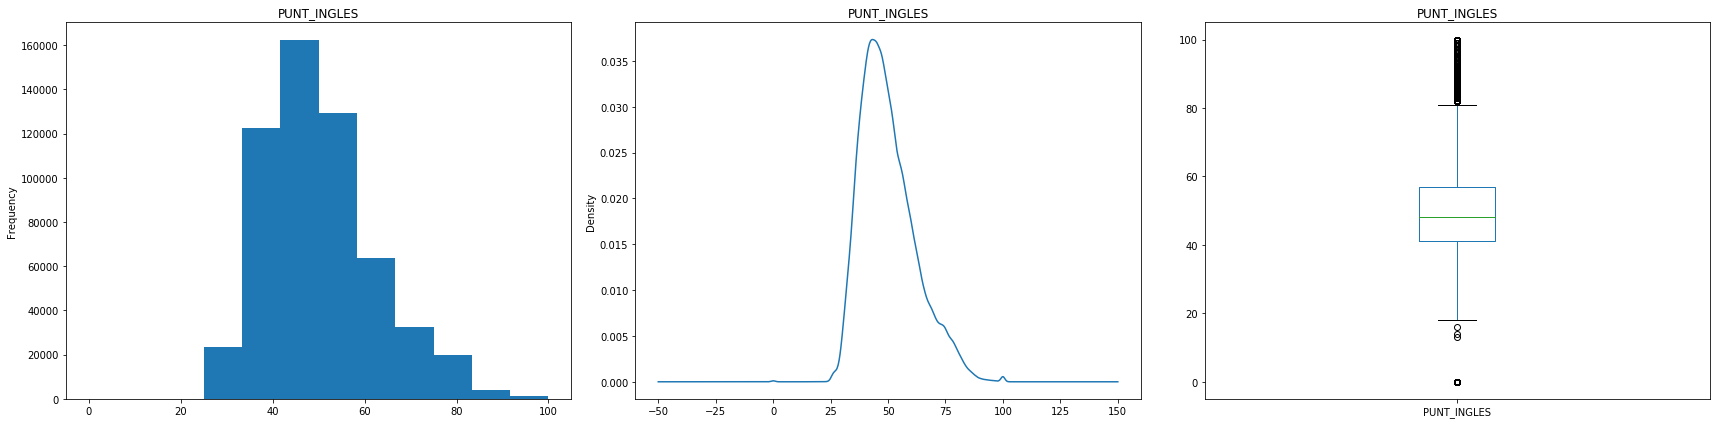

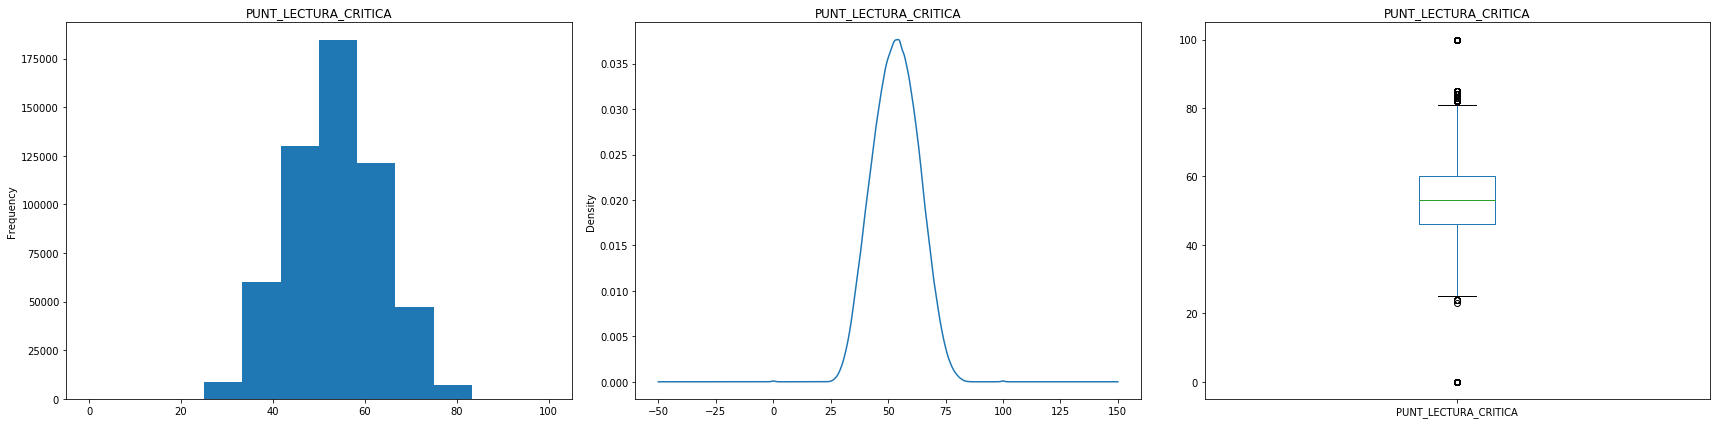

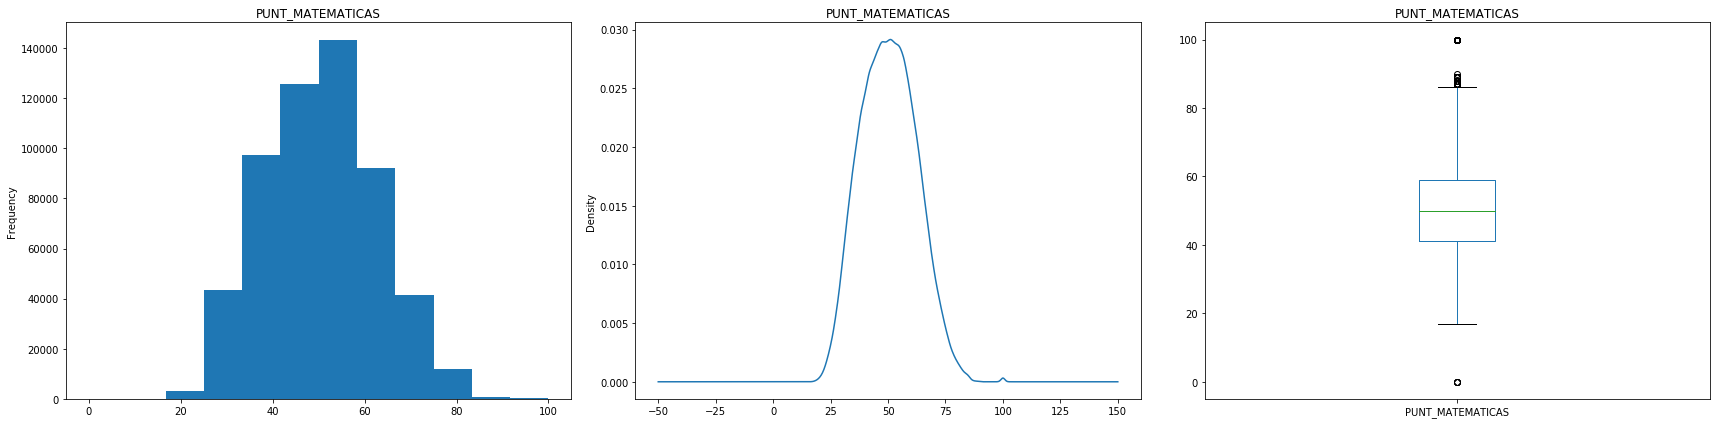

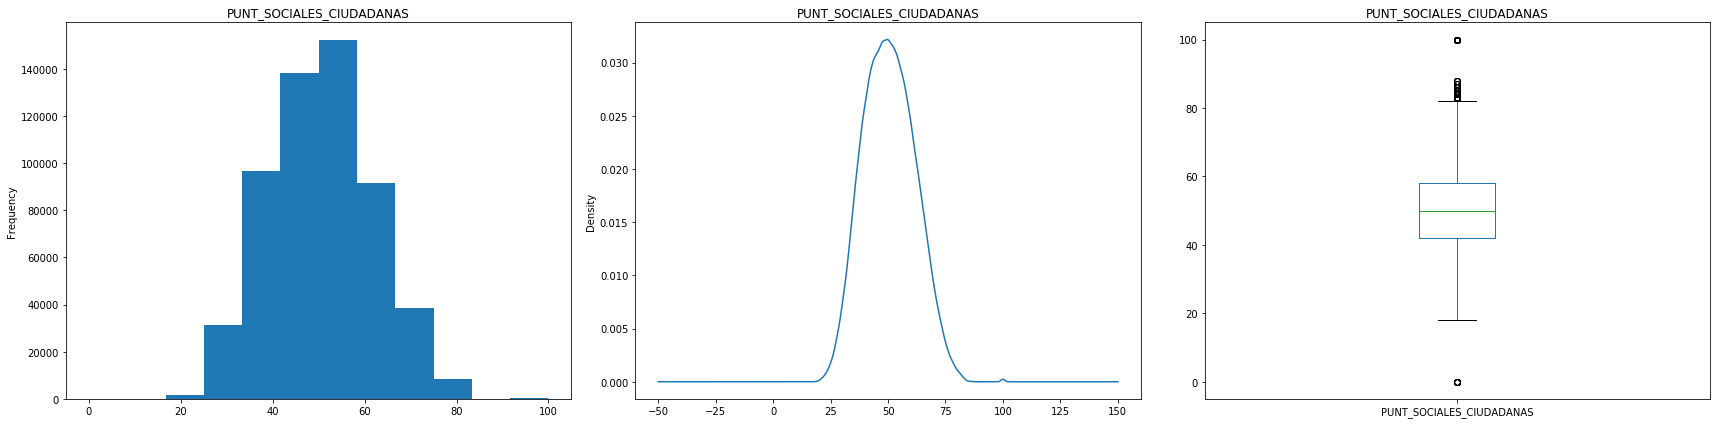

In [20]:
# Plots

def plot_numeric(df):
    c = 3
    r = 1
    for i in df.columns:
        fig, axes = plt.subplots(r, c, figsize=(8*c, 6*r))
        axes = np.array(axes).reshape(-1, c)
    
        for axe in axes:
            df[i].plot.hist(bins=12, ax=axe[0], title=i)
            df[i].plot.density(ax=axe[1], title=i)
            df[i].plot.box(ax=axe[2], title=i)
        
        plt.tight_layout()
    
        plt.show()
            
plot_numeric(numeric_icfes)